<a href="https://colab.research.google.com/github/ismailali121/LinearRegression_BikeDemandPrediction/blob/main/BikeSharingDemandPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















### Variables Description

Answer Here

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid",{'grid.linestyle':'--'})

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Mounting drive where dataset file is present
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
bike_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/Module 4 - Machine Learning/LinearRegression_CapstoneProject/SeoulBikeData.csv", encoding='ISO-8859-1')

### Dataset First View

In [ ]:
# Dataset First Look
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

In [ ]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

In [ ]:
# Dataset Describe
bike_df.describe().transpose()

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

From the above we know that
1. Dataset has 14 coulmns and 8460 rows
2. There are no Duplicate values in the Dataset
3. There are no Null Values in the Dataset

Therefore the Dataset is ready for EDA!!

## 3. ***Exploratory Data Analysis***

In [ ]:
# Converting Date Column to Datetime format
bike_df['Date']=pd.to_datetime(bike_df['Date'])


In [ ]:
# Extracting the required info from Date column
bike_df['month']=bike_df['Date'].dt.month
bike_df['day_of_week']=bike_df['Date'].dt.day_name()
bike_df['weekday_weekend']=bike_df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [ ]:
# Droping the date and day_of_week columns
bike_df.drop(columns=['Date','day_of_week'], inplace=True)

In [ ]:
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  month  \
0           0.0            0.0  Winter  No Holiday             Yes      1   
1           0.0            0.0  Winter  No Holiday             Yes      1   
2           0.0            0.0  Winter  No Holiday             Yes      1   
3           0.0            0.0  Winter  No Holiday             Yes      1   
4           0.0            0.0  Winter  No Holiday             Yes      1   

   weekday_weekend  
0                0  
1                0  
2                0  
3                0  
4                0

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

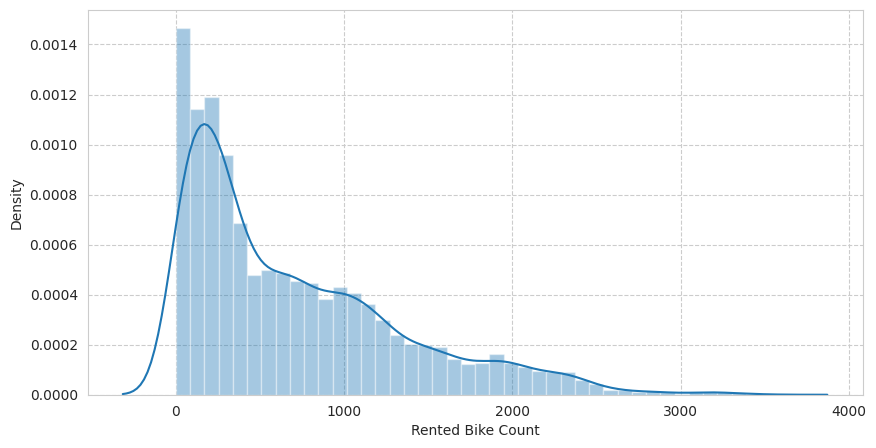

In [ ]:
# checking the distribution of our Dependent Variable
plt.figure(figsize=(10,5))
sns.distplot(bike_df['Rented Bike Count'])

In Linear Regression we assume that the distribution of Dependent variable has to be **Normal**. Hence we will apply **Square Root Transformation** on the our Dependent variable

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

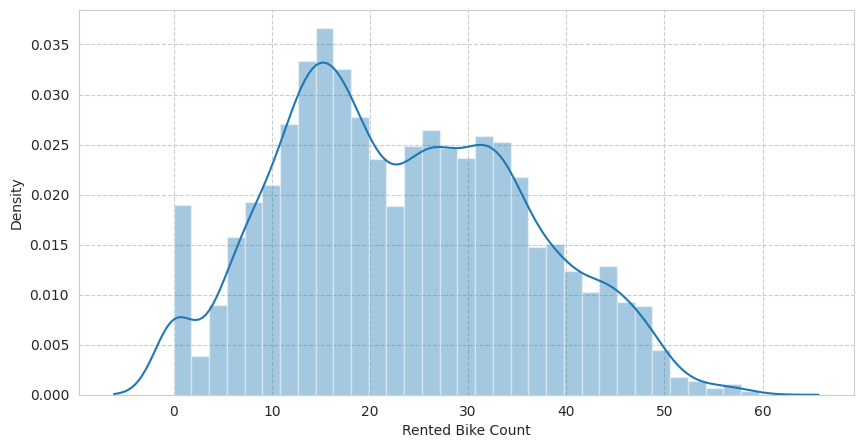

In [ ]:
#square root transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']))

### Analysing the **Numerical features** of our dataset

In [ ]:
# Extracting the numerical features of dataset
num_features = bike_df.describe().columns
num_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekday_weekend'],
      dtype='object')

In [ ]:
# Creating a function to plot features distribution
def feat_dist(feature):
  sns.distplot(bike_df[feature])
  plt.axvline(bike_df[feature].mean(),linestyle='dashed',color='g')
  plt.axvline(bike_df[feature].median(),linestyle='dashed', color='r')
  plt.show()

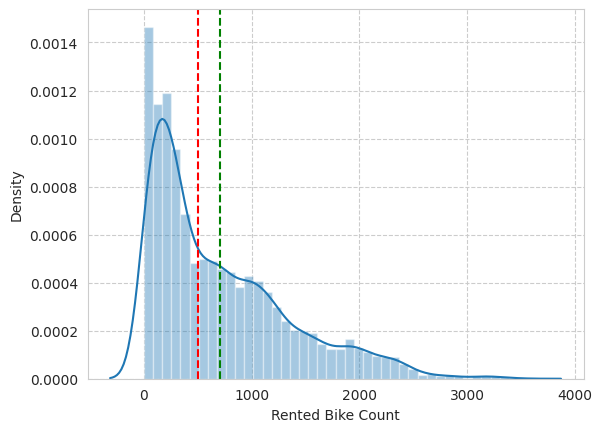

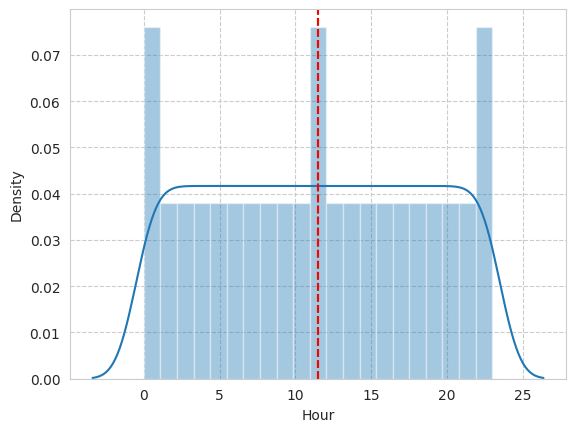

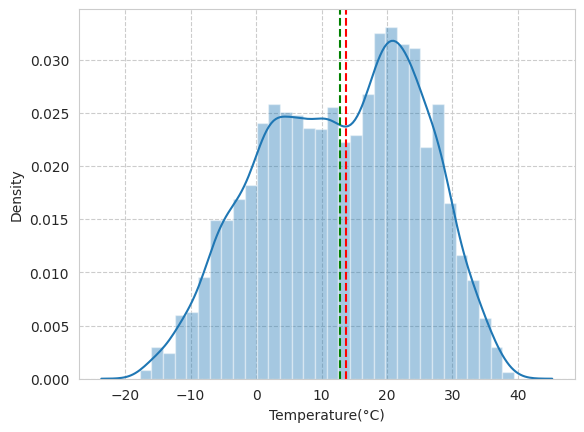

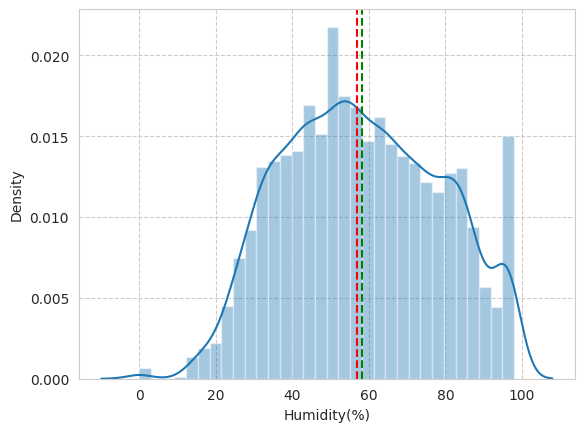

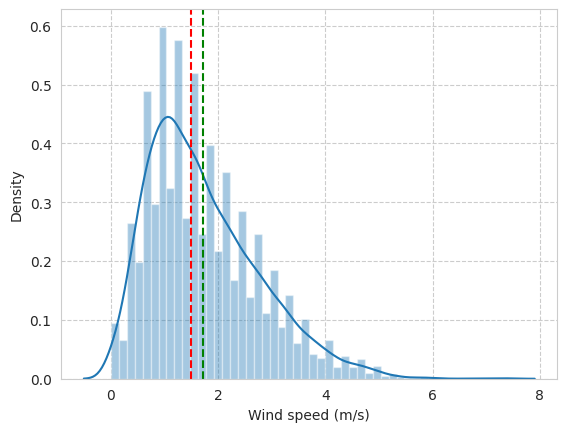

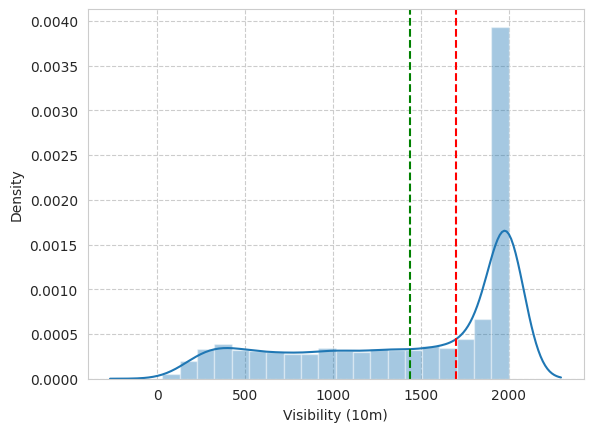

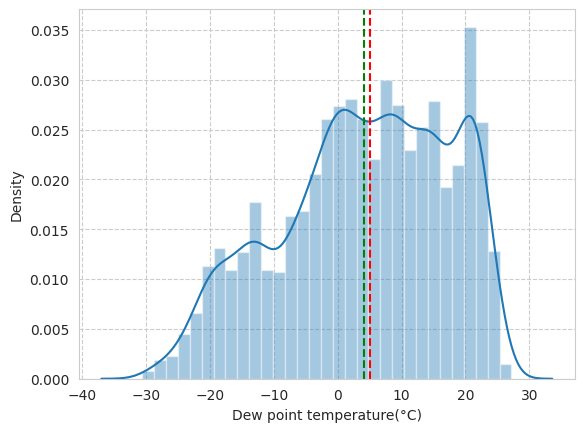

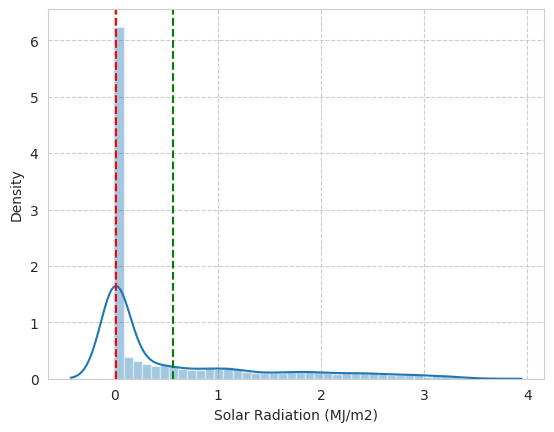

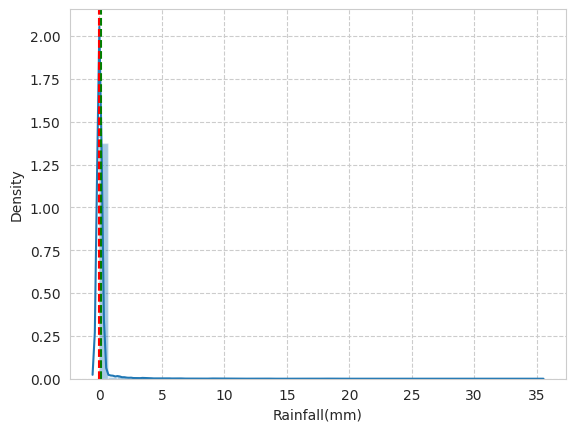

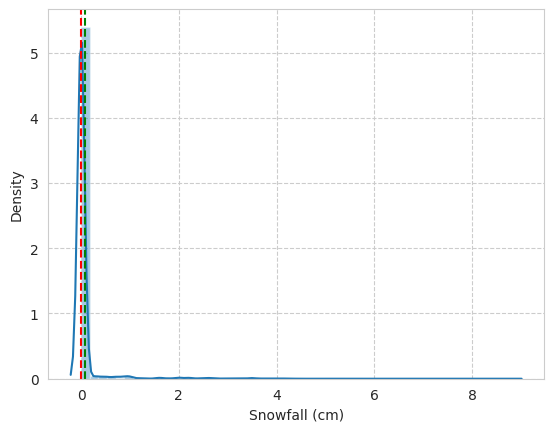

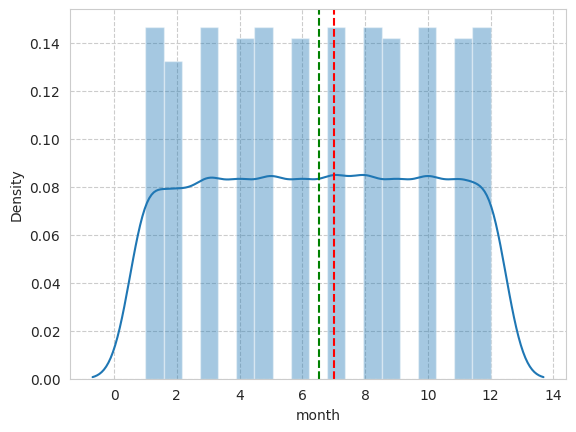

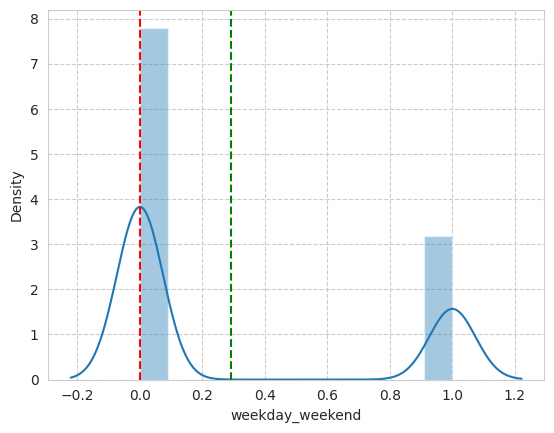

In [ ]:
# Plotting distribution plot for each numerical feature along with mean & median
for feature in num_features:
   feat_dist(feature)

Lets check the relation of each numerical feature with Depedent variable (Rented Bike Count) by drawing **Regression plots** for each of them

In [ ]:
def reg_plot(feature):
  sns.regplot(x=bike_df[feature],y=bike_df['Rented Bike Count'],line_kws={'color':'red'})
  plt.show()

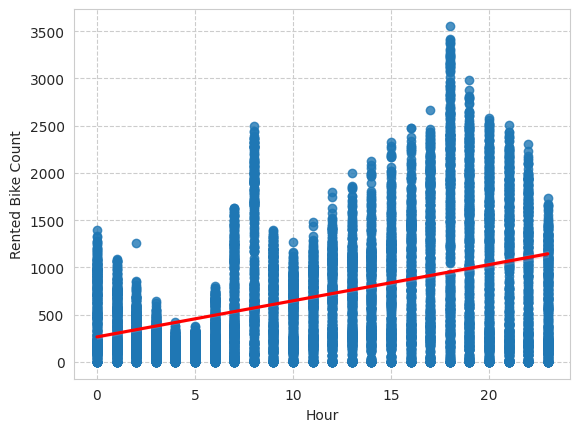

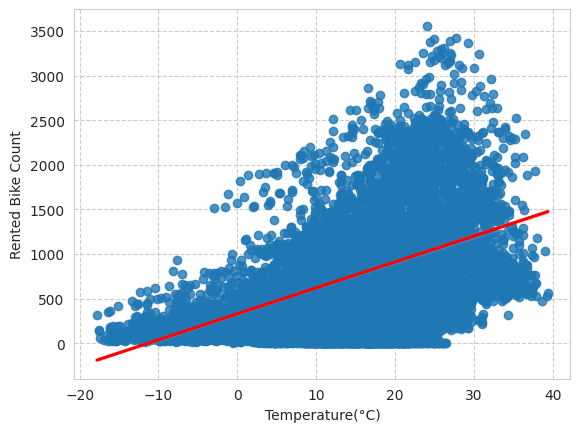

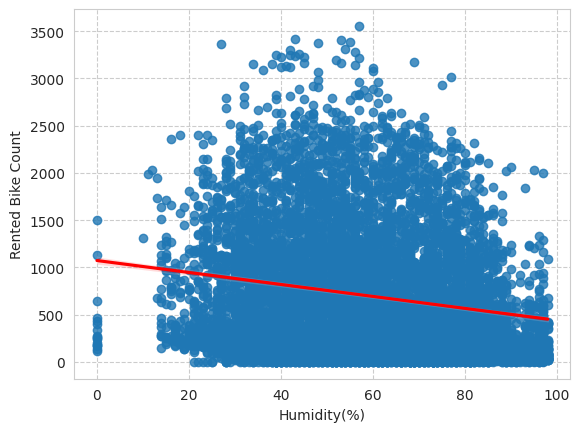

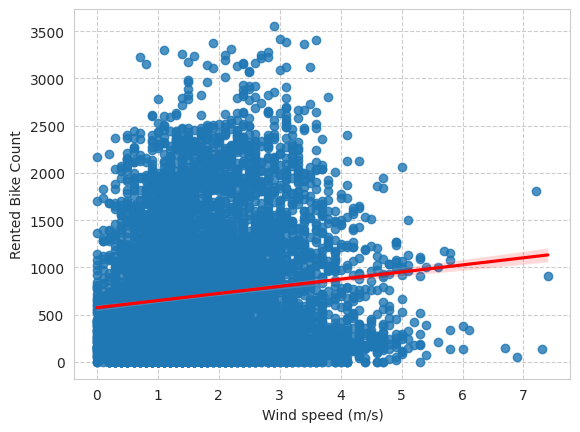

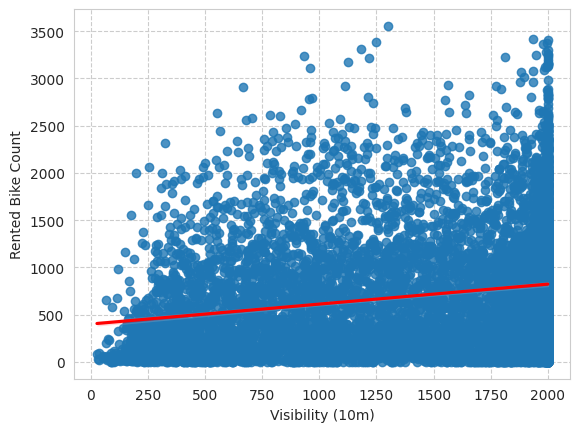

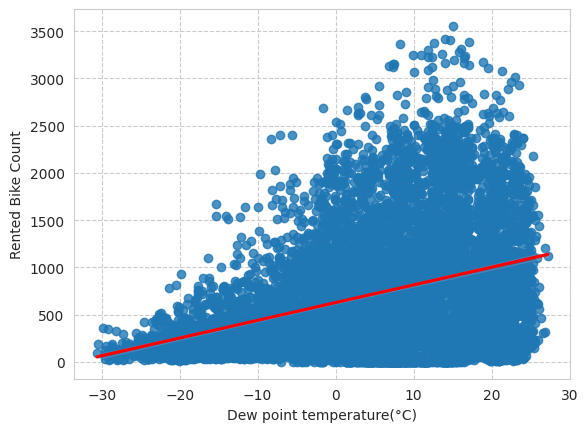

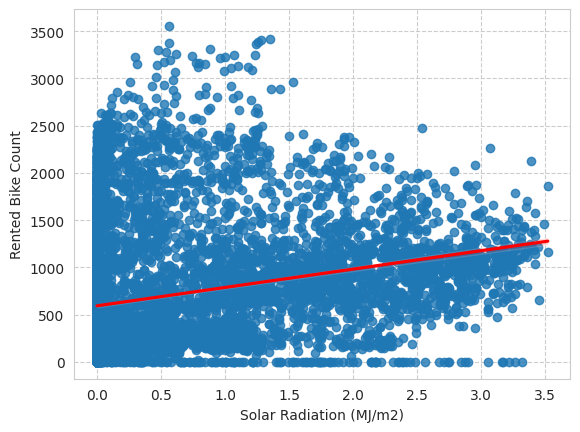

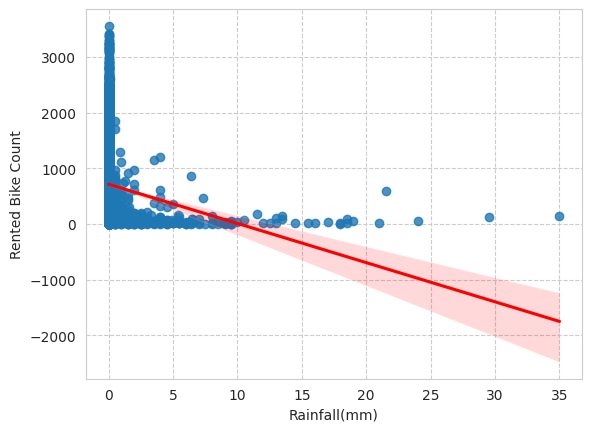

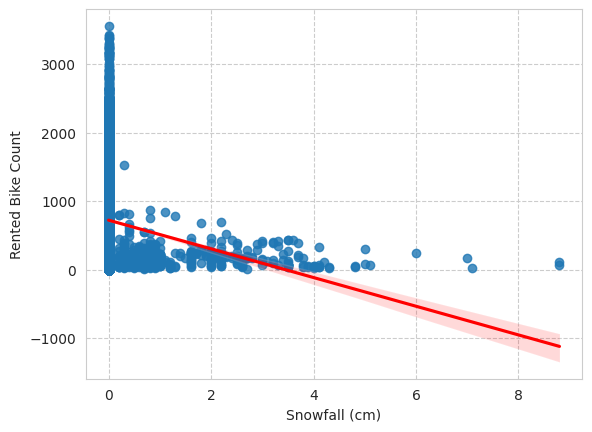

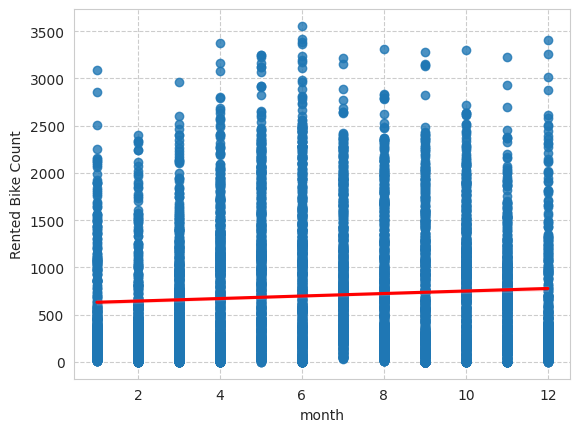

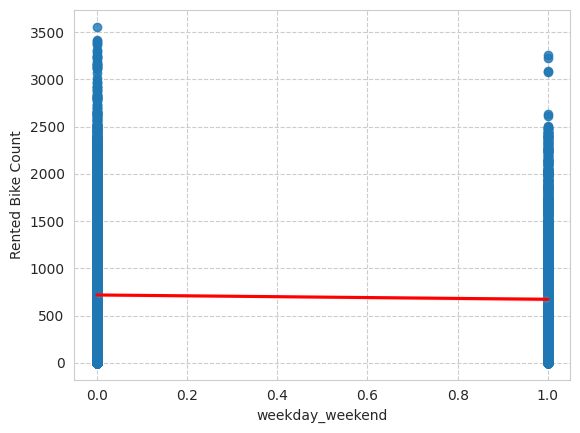

In [ ]:
# Visualizing the Regresion plots of each feature with dependent variable
for feature in num_features:
  if feature!='Rented Bike Count':
    reg_plot(feature)

### Analysing the **Categorical features** of our dataset

In [ ]:
# Extracting the Categorical features of our Dataset
cat_features = bike_df.select_dtypes(include='object')
cat_features.head()

Seasons     Holiday Functioning Day
0  Winter  No Holiday             Yes
1  Winter  No Holiday             Yes
2  Winter  No Holiday             Yes
3  Winter  No Holiday             Yes
4  Winter  No Holiday             Yes

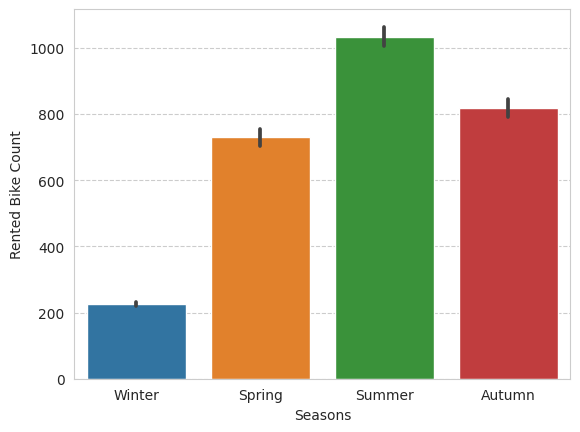

<Figure size 1000x800 with 0 Axes>

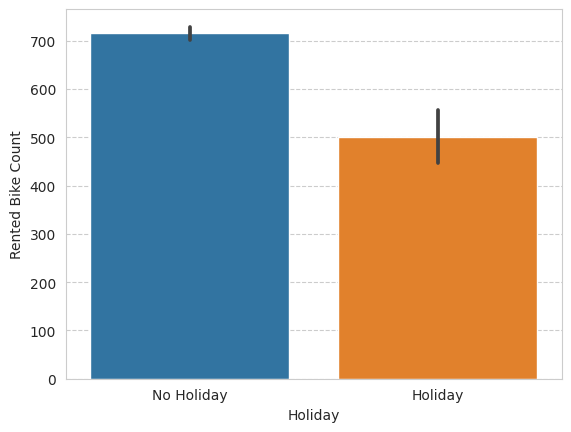

<Figure size 1000x800 with 0 Axes>

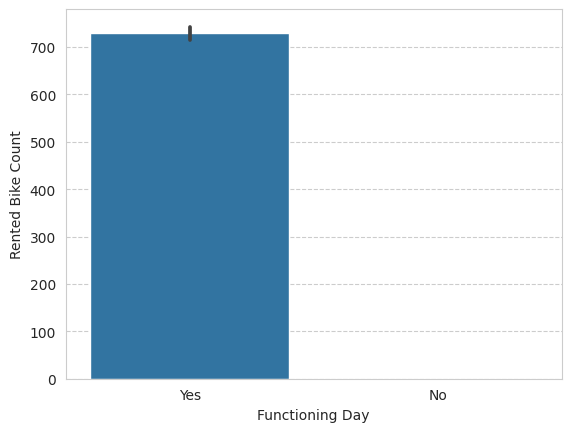

<Figure size 1000x800 with 0 Axes>

In [ ]:
# plotting box plot for cateogorical features with dependent variable
for feature in cat_features:
  sns.barplot(x=bike_df[feature],y=bike_df['Rented Bike Count'])
  plt.figure(figsize=(10,8))
  plt.show()


From the above plots we can see that

1. There is high demand in Summers and less demand in winters
2. There is slightly higher demand on No Holidays
3. There is almost no demand on Non Functioning days

Lets check if there is any count on Non functioning days or not

In [ ]:
# Checking count for Fuctioning days
bike_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

As expected comparetively there is very less demand Non Functioning Days

<Axes: xlabel='month', ylabel='Rented Bike Count'>

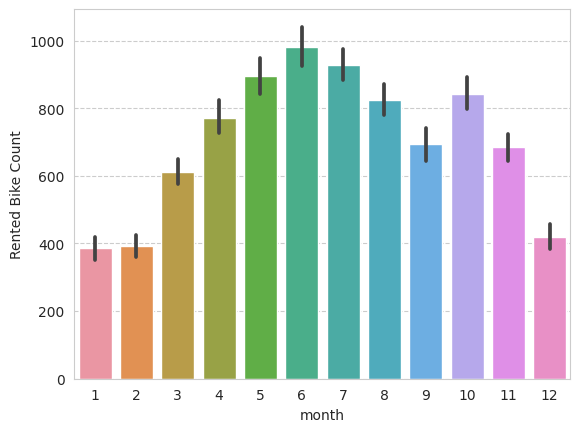

In [ ]:
# Checking Rented bike count relation with the Month of year
sns.barplot(x=bike_df['month'],y=bike_df['Rented Bike Count'])

From the above graph we can see that
1. May, June, July Months have the most rented bikes count
2. Whereas January and February have relatively lesser Rented bikes count

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

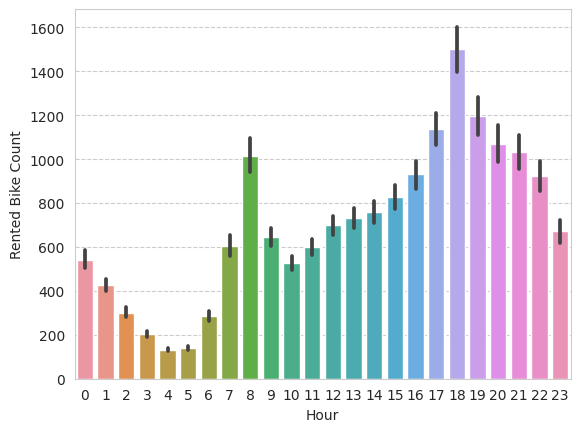

In [ ]:
# Checking Rented bikes count at each hour
sns.barplot(x=bike_df['Hour'],y=bike_df['Rented Bike Count'])

<Axes: title={'center': 'Average of Bikes Rented per hour'}, xlabel='Hour'>

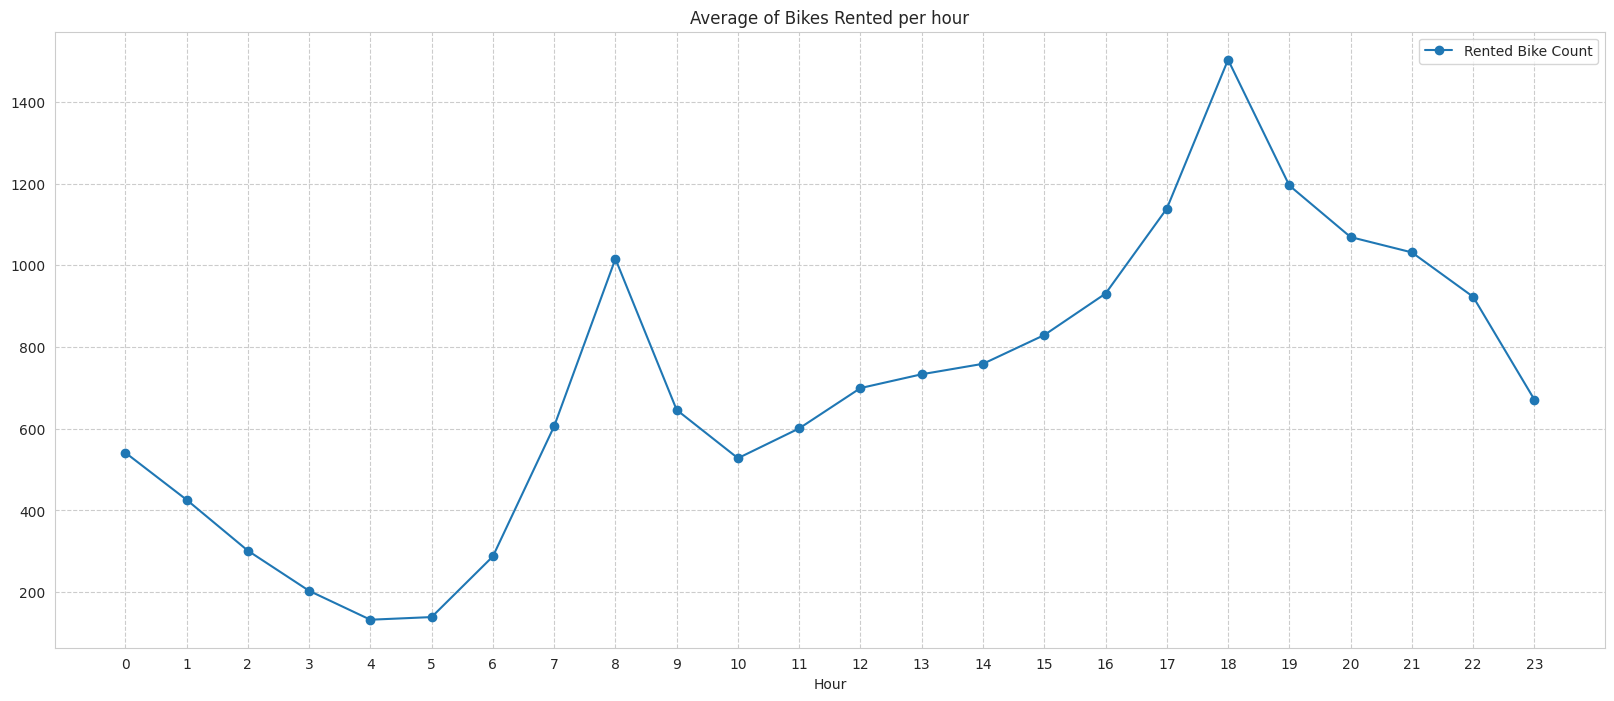

In [ ]:
# Grouping the rented bikes count by hour & getting the average of each hour
avg_rents_hrs = bike_df.groupby('Hour')['Rented Bike Count'].mean()

# Plotting a line graph of avg rents over time (Hrs)
plt.figure(figsize=(20,8))
avg_rents_hrs.plot(legend=True,marker='o',title='Average of Bikes Rented per hour',xticks=range(len(avg_rents_hrs)))

We can see from the above graph that

1. There is high demand for bikes at 8AM and 6PM
2. This demand for rented bikes might be due to use of bikes for office transit.

### Checking for **Multicollinearity**

<Axes: >

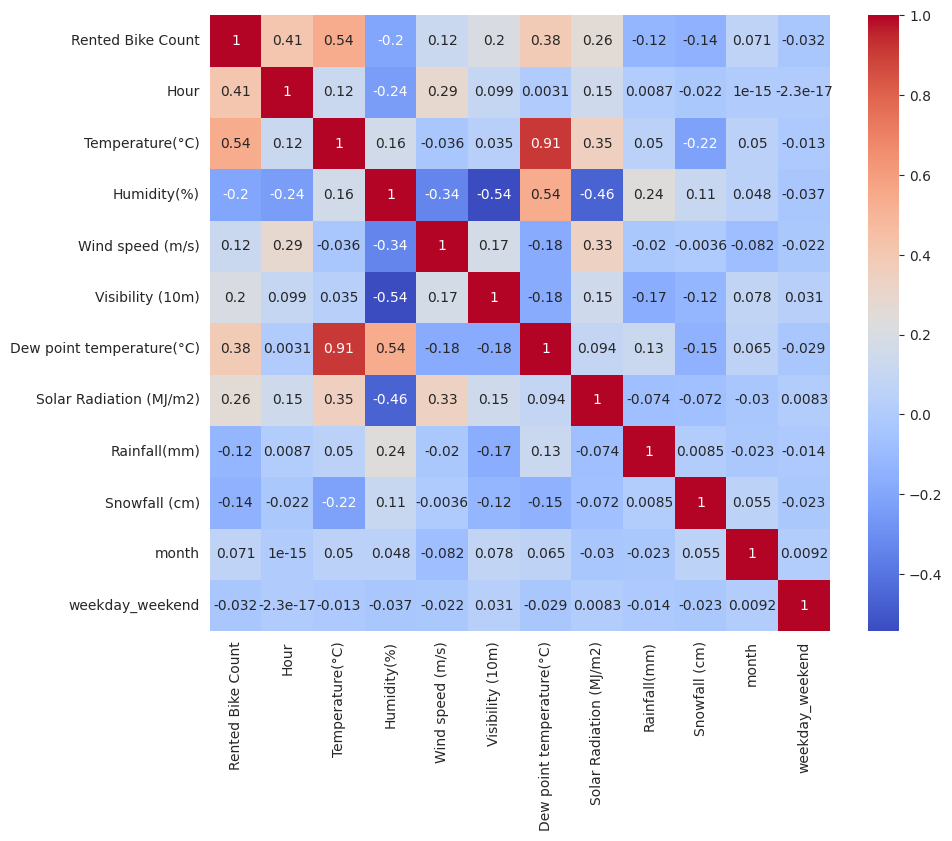

In [ ]:
# plotting a correlation map
plt.figure(figsize=(10,8))
sns.heatmap(bike_df.corr(), annot=True, cmap='coolwarm')

From the above heatmap we can observe that

1. **Multicollinearity** is present between two features namely **Temperature** and **Dew Point Temperature**

2. Hence we can drop the feature **Dew Point Temperature (C)** as it is less correlated to Dependent variable-Rented Bike Count (Corr=0.38) when compared to feature **Temperature (C)** correlation (Corr=0.54)

In [ ]:
# droping "Dew Point Temperature" Feature as it is Multicorrelated with "Temperature" Feature
bike_df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)
bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

  Seasons     Holiday Functioning Day  month  weekday_weekend  
0  Winter  No Holiday             Yes      1                0  
1  Winter  No Holiday             Yes      1                0  
2  Winter  No Holiday             Yes      1                0  
3  Winter  No Holiday             Yes      1                0  
4  Winter  No Holiday             Yes      1                0

## **Feature Engineering**

In this step, We will be performing the below

1. Applying log to '**Rented Bike Count**' as it is **positivley skewed** and to perform Linear Regression the **Dependent Variable** must be **normaly distributed**

2. Removing **Outliers**

3. **One Hot Coding** to Categorical features

4. **MinMax Scaling** the features

In [ ]:
# Creating a function to replace 1 with 0 in Dependent Variable, as we will be applying log to the Dependent variable
def log_dv(x):
  if x==0:
    return 1
  else:
    return x

In [ ]:
# Applying the above function to dependent variable
bike_df['Rented Bike Count'] = bike_df['Rented Bike Count'].apply(log_dv)

Text(0.5, 1.0, 'Distribution of Rented Bike Count')

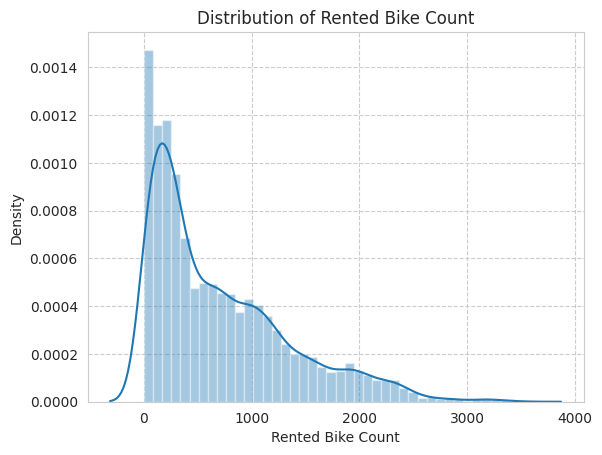

In [ ]:
# Dependent variable distribution before log transformation
sns.distplot(bike_df['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')

Text(0.5, 1.0, 'Distribution of Rented Bike Count')

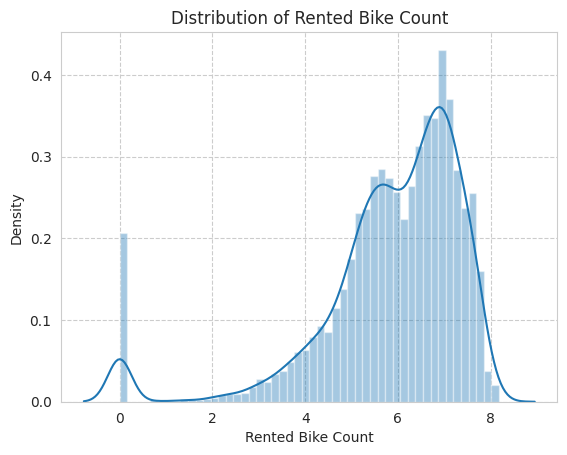

In [ ]:
# Applying log to the dependent variable
bike_df['Rented Bike Count']=np.log(bike_df['Rented Bike Count'])

# Dependent variable distribution After log transformation
sns.distplot(bike_df['Rented Bike Count'])
plt.title('Distribution of Rented Bike Count')

### **Checking and Removing Outliers**

In [ ]:
# checking for outliers
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean            5.882209    11.500000        12.882922    58.226256   
std             1.585281     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%             5.252273     5.750000         3.500000    42.000000   
50%             6.223567    11.500000        13.700000    57.000000   
75%             6.970965    17.250000        22.500000    74.000000   
max             8.176392    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
count       8760.000000       8760.000000              8760.000000   
mean           1.724909       1436.825799                 0.569111   
std            1.036300        608.298712                 0.868746   
min            0.000000         27.000000                 0.000000   
25%            0.900000        940.000000                 0.000000   
50%            1.500000       1698.000000                 0.010000   
75%            2.300000       2000.000000                 0.930000   
max            7.400000       2000.000000                 3.520000   

       Rainfall(mm)  Snowfall (cm)        month  weekday_weekend  
count   8760.000000    8760.000000  8760.000000      8760.000000  
mean       0.148687       0.075068     6.526027         0.290411  
std        1.128193       0.436746     3.448048         0.453978  
min        0.000000       0.000000     1.000000         0.000000  
25%        0.000000       0.000000     4.000000         0.000000  
50%        0.000000       0.000000     7.000000         0.000000  
75%        0.000000       0.000000    10.000000         1.000000  
max       35.000000       8.800000    12.000000         1.000000

In the datset every feature has some outliers, So we have to remove these outliers

In [ ]:
bike_df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'month', 'weekday_weekend'],
      dtype='object')

In [ ]:
# REMOVING OUTLIERS
# using a for loop to store the indices of outliers
indices=[]                                                                                              # Creating any empty list
for feature in bike_df.describe().columns:
  x=bike_df[feature]
  mean=bike_df[feature].mean()
  std=bike_df[feature].std()
  index=bike_df[ (np.abs(x))- (mean) >= (3*std)].index                                                    # getting the each outlier index
  indices.append(index)

In [ ]:
list(indices)

[Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([  85,   87,   89,  249,  253,  375,  611,  615,  933,  937,  974,
             1309, 1409, 1575, 1720, 1721, 1722, 1723, 1724, 1791, 2034, 2169,
             2170, 2174, 2177, 3042, 3053, 3055, 3058, 3063, 3065, 3133, 3134,
             3136, 3137, 3138, 3139, 3140, 3141, 3142, 3181, 3182, 3710, 3712,
             4188, 4190, 4985, 6311, 6316, 6641, 6684, 6686, 6687, 6689, 7429,
             7549, 7550, 7835, 7916, 7932, 7937, 7985, 8245],
            dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([2989, 3157, 3181, 3277, 3325, 3396, 3397, 3398, 3493, 3564, 3565,
             3566, 3589, 3708, 3709, 3710, 3828, 3829, 3853, 3854, 4068, 4069,
             4070, 4116, 4117, 4164, 4165, 4166, 4188, 4189, 4190, 4212, 4213,
             4236, 4237, 4284, 4285, 4286, 4356, 4357, 4380, 4381, 4382, 4404,
             4405, 4406, 4428, 4429, 44

We are having **173 outliers** for one of the features (**Snowfall Feature**). So we will be droping these rows.

In [ ]:
# Creating a copy of dataset
new_bike_df=bike_df.copy()

In [ ]:
# Removing the outliers from the dataset
new_bike_df.drop(list(indices)[7], inplace=True)
new_bike_df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0           5.537334     0             -5.2           37               2.2   
1           5.318120     1             -5.5           38               0.8   
2           5.153292     2             -6.0           39               1.0   
3           4.672829     3             -6.2           40               0.9   
4           4.356709     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

  Seasons     Holiday Functioning Day  month  weekday_weekend  
0  Winter  No Holiday             Yes      1                0  
1  Winter  No Holiday             Yes      1                0  
2  Winter  No Holiday             Yes      1                0  
3  Winter  No Holiday             Yes      1                0  
4  Winter  No Holiday             Yes      1                0

### **One Hot Coding** - Categorical Features

In [ ]:
cat_features = new_bike_df.select_dtypes(include='object')

In [ ]:
# Creating dummy variables for Categorical features
dummy_cat_features=pd.get_dummies(cat_features,drop_first=True)
dummy_cat_features

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8666 rows x 5 columns]

In [ ]:
# concating numeric columns and dummy columns and creating final_df
final_df= pd.concat([dummy_cat_features,new_bike_df],axis=1)
final_df.drop(columns=['Seasons','Holiday','Functioning Day'],inplace=True)
final_df

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning Day_Yes  Rented Bike Count  Hour  Temperature(°C)  \
0                       1           5.537334     0             -5.2   
1                       1           5.318120     1             -5.5   
2                       1           5.153292     2             -6.0   
3                       1           4.672829     3             -6.2   
4                       1           4.356709     4             -6.0   
...                   ...                ...   ...              ...   
8755                    1           6.910751    19              4.2   
8756                    1           6.638568    20              3.4   
8757                    1           6.542472    21              2.6   
8758                    1           6.568078    22              2.1   
8759                    1           6.369901    23              1.9   

      Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0              37               2.2              2000   
1              38               0.8              2000   
2              39               1.0              2000   
3              40               0.9              2000   
4              36               2.3              2000   
...           ...               ...               ...   
8755           34               2.6              1894   
8756           37               2.3              2000   
8757           39               0.3              1968   
8758           41               1.0              1859   
8759           43               1.3              1909   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  month  \
0                         0.0           0.0            0.0      1   
1                         0.0           0.0            0.0      1   
2                         0.0           0.0            0.0      1   
3                         0.0           0.0            0.0      1   
4                         0.0           0.0            0.0      1   
...                       ...           ...            ...    ...   
8755                      0.0           0.0            0.0     11   
8756                      0.0           0.0            0.0     11   
8757                      0.0           0.0            0.0     11   
8758                      0.0           0.0            0.0     11   
8759                      0.0           0.0            0.0     11   

      weekday_weekend  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
8755                0  
8756                0  
8757                0  
8758                0  
8759                0  

[8666 rows x 16 columns]

In [ ]:
final_df.describe().transpose()

count         mean         std   min         25%  \
Seasons_Spring           8666.0     0.252366    0.434395   0.0    0.000000   
Seasons_Summer           8666.0     0.249827    0.432938   0.0    0.000000   
Seasons_Winter           8666.0     0.248558    0.432202   0.0    0.000000   
Holiday_No Holiday       8666.0     0.950381    0.217169   0.0    1.000000   
Functioning Day_Yes      8666.0     0.966305    0.180453   0.0    1.000000   
Rented Bike Count        8666.0     5.908273    1.566490   0.0    5.283204   
Hour                     8666.0    11.496077    6.929705   0.0    5.000000   
Temperature(°C)          8666.0    12.831445   11.980748 -17.8    3.300000   
Humidity(%)              8666.0    57.821602   20.094291   0.0   42.000000   
Wind speed (m/s)         8666.0     1.726841    1.036873   0.0    0.900000   
Visibility (10m)         8666.0  1445.964574  603.210416  27.0  958.000000   
Solar Radiation (MJ/m2)  8666.0     0.574396    0.871860   0.0    0.000000   
Rainfall(mm)             8666.0     0.054962    0.314532   0.0    0.000000   
Snowfall (cm)            8666.0     0.074590    0.430339   0.0    0.000000   
month                    8666.0     6.534503    3.453661   1.0    4.000000   
weekday_weekend          8666.0     0.290215    0.453888   0.0    0.000000   

                                 50%          75%          max  
Seasons_Spring              0.000000     1.000000     1.000000  
Seasons_Summer              0.000000     0.000000     1.000000  
Seasons_Winter              0.000000     0.000000     1.000000  
Holiday_No Holiday          1.000000     1.000000     1.000000  
Functioning Day_Yes         1.000000     1.000000     1.000000  
Rented Bike Count           6.247075     6.976115     8.176392  
Hour                       11.000000    17.000000    23.000000  
Temperature(°C)            13.600000    22.500000    39.400000  
Humidity(%)                57.000000    73.000000    98.000000  
Wind speed (m/s)            1.500000     2.300000     7.400000  
Visibility (10m)         1708.500000  2000.000000  2000.000000  
Solar Radiation (MJ/m2)     0.010000     0.940000     3.520000  
Rainfall(mm)                0.000000     0.000000     3.500000  
Snowfall (cm)               0.000000     0.000000     8.800000  
month                       7.000000    10.000000    12.000000  
weekday_weekend             0.000000     1.000000     1.000000

### **Feature Scaling** - Using MinMax Scaler

In [ ]:
# storing independent and dependent features
dep_var = 'Rented Bike Count'
indep_var = list(set(final_df.columns.tolist()) - {dep_var})

In [ ]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
final_df[indep_var] = scaler.fit_transform(final_df[indep_var])

In [ ]:
# Inspecting the data after feature scaling
final_df.head()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0             0.0             0.0             1.0                 1.0   
1             0.0             0.0             1.0                 1.0   
2             0.0             0.0             1.0                 1.0   
3             0.0             0.0             1.0                 1.0   
4             0.0             0.0             1.0                 1.0   

   Functioning Day_Yes  Rented Bike Count      Hour  Temperature(°C)  \
0                  1.0           5.537334  0.000000         0.220280   
1                  1.0           5.318120  0.043478         0.215035   
2                  1.0           5.153292  0.086957         0.206294   
3                  1.0           4.672829  0.130435         0.202797   
4                  1.0           4.356709  0.173913         0.206294   

   Humidity(%)  Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  \
0     0.377551          0.297297               1.0                      0.0   
1     0.387755          0.108108               1.0                      0.0   
2     0.397959          0.135135               1.0                      0.0   
3     0.408163          0.121622               1.0                      0.0   
4     0.367347          0.310811               1.0                      0.0   

   Rainfall(mm)  Snowfall (cm)  month  weekday_weekend  
0           0.0            0.0    0.0              0.0  
1           0.0            0.0    0.0              0.0  
2           0.0            0.0    0.0              0.0  
3           0.0            0.0    0.0              0.0  
4           0.0            0.0    0.0              0.0

In [ ]:
# Observing statistical values of the data
final_df.describe()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
count     8666.000000     8666.000000     8666.000000         8666.000000   
mean         0.252366        0.249827        0.248558            0.950381   
std          0.434395        0.432938        0.432202            0.217169   
min          0.000000        0.000000        0.000000            0.000000   
25%          0.000000        0.000000        0.000000            1.000000   
50%          0.000000        0.000000        0.000000            1.000000   
75%          1.000000        0.000000        0.000000            1.000000   
max          1.000000        1.000000        1.000000            1.000000   

       Functioning Day_Yes  Rented Bike Count         Hour  Temperature(°C)  \
count          8666.000000        8666.000000  8666.000000      8666.000000   
mean              0.966305           5.908273     0.499829         0.535515   
std               0.180453           1.566490     0.301292         0.209454   
min               0.000000           0.000000     0.000000         0.000000   
25%               1.000000           5.283204     0.217391         0.368881   
50%               1.000000           6.247075     0.478261         0.548951   
75%               1.000000           6.976115     0.739130         0.704545   
max               1.000000           8.176392     1.000000         1.000000   

       Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count  8666.000000       8666.000000       8666.000000   
mean      0.590016          0.233357          0.719191   
std       0.205044          0.140118          0.305733   
min       0.000000          0.000000          0.000000   
25%       0.428571          0.121622          0.471870   
50%       0.581633          0.202703          0.852255   
75%       0.744898          0.310811          1.000000   
max       1.000000          1.000000          1.000000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)        month  \
count              8666.000000   8666.000000    8666.000000  8666.000000   
mean                  0.163181      0.015703       0.008476     0.503137   
std                   0.247687      0.089866       0.048902     0.313969   
min                   0.000000      0.000000       0.000000     0.000000   
25%                   0.000000      0.000000       0.000000     0.272727   
50%                   0.002841      0.000000       0.000000     0.545455   
75%                   0.267045      0.000000       0.000000     0.818182   
max                   1.000000      1.000000       1.000000     1.000000   

       weekday_weekend  
count      8666.000000  
mean          0.290215  
std           0.453888  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

## **Creating Functions** - To Train Model and Plot graphs

In [ ]:
#creating empty lists to store the metrics values of all models
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
# Creating a function to train and evaluate model

def train_model(model,X_train,y_train,X_test,y_test):

  # Traing the model on training dataset
  model.fit(X_train,y_train)

  # Predicting the values for test dataset using our model
  pred = model.predict(X_test)

  # importing metrics libraries for model evaluation
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  # Evaluating the Model
  print('\n******************----- Model Evaluation Metrics Summary -----******************\n')

  # Finding the Mean Squared Error
  MSE = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  # Finding the Root Mean Squared Error
  RMSE = np.sqrt(MSE)
  print("RMSE :" , RMSE)

  # Finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)

  # Finding the Adjusted r2 Score
  adj_r2 = 1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)

  print('\n********************************************************************************\n')

  # Storing each model Evaluation metrices to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)


  # ploting the line graph of actual and predicted values
  print('\n***********************----- Model Evaluation Graph -----***********************\n')
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):

  # Traing the model on training dataset
  model.fit(X_train,y_train)

  # Predicting the values for test dataset using our model
  preds = model.predict(X_test)

  # importing metrics libraries for model evaluation
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  # Evaluating the Model
  print('\n******************----- Model Evaluation Metrics Summary -----******************\n')

  # Finding the Mean Squared Error
  MSE = mean_squared_error(y_test**2,preds**2)
  print("MSE :" , MSE)

  # Finding the Root Mean Squared Error
  RMSE = np.sqrt(MSE)
  print("RMSE :" , RMSE)

  # Finding the r2 score
  r2 = r2_score(y_test**2,preds**2)
  print("R2 :" ,r2)

  # Finding the Adjusted r2 Score
  adj_r2 = 1-(1-r2_score(y_test**2,preds**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)

  training_set_preds = linear_model.predict(X_train)

  print('\n********************************************************************************\n')

  # Storing each model Evaluation metrices to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  # ploting the line graph of actual and predicted values
  print('\n******************----- Model Evaluation Metrics Summary -----******************\n')
  plt.figure(figsize=(20,10))
  plt.plot(np.array(y_test[:100]))
  plt.plot(preds[:100])
  plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
  plt.show()

In [ ]:
# Creating a Function for Feature Importance
def get_features_importance (optimal_model,X_train):
  '''
  This function plots graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

## **Regression Models**

Splitting data into Training and Testing sets

In [ ]:
# Storing data of independent features and dependent feature into X and y respectively
X = final_df[indep_var]
y = final_df[dep_var]

In [ ]:
# splitting data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression()


******************----- Model Evaluation Metrics Summary -----******************

MSE : 53.579045267976745
RMSE : 7.319770848050966
R2 : 0.7488462553985176
Adjusted R2 :  0.747094834585397

********************************************************************************


***********************----- Model Evaluation Graph -----***********************



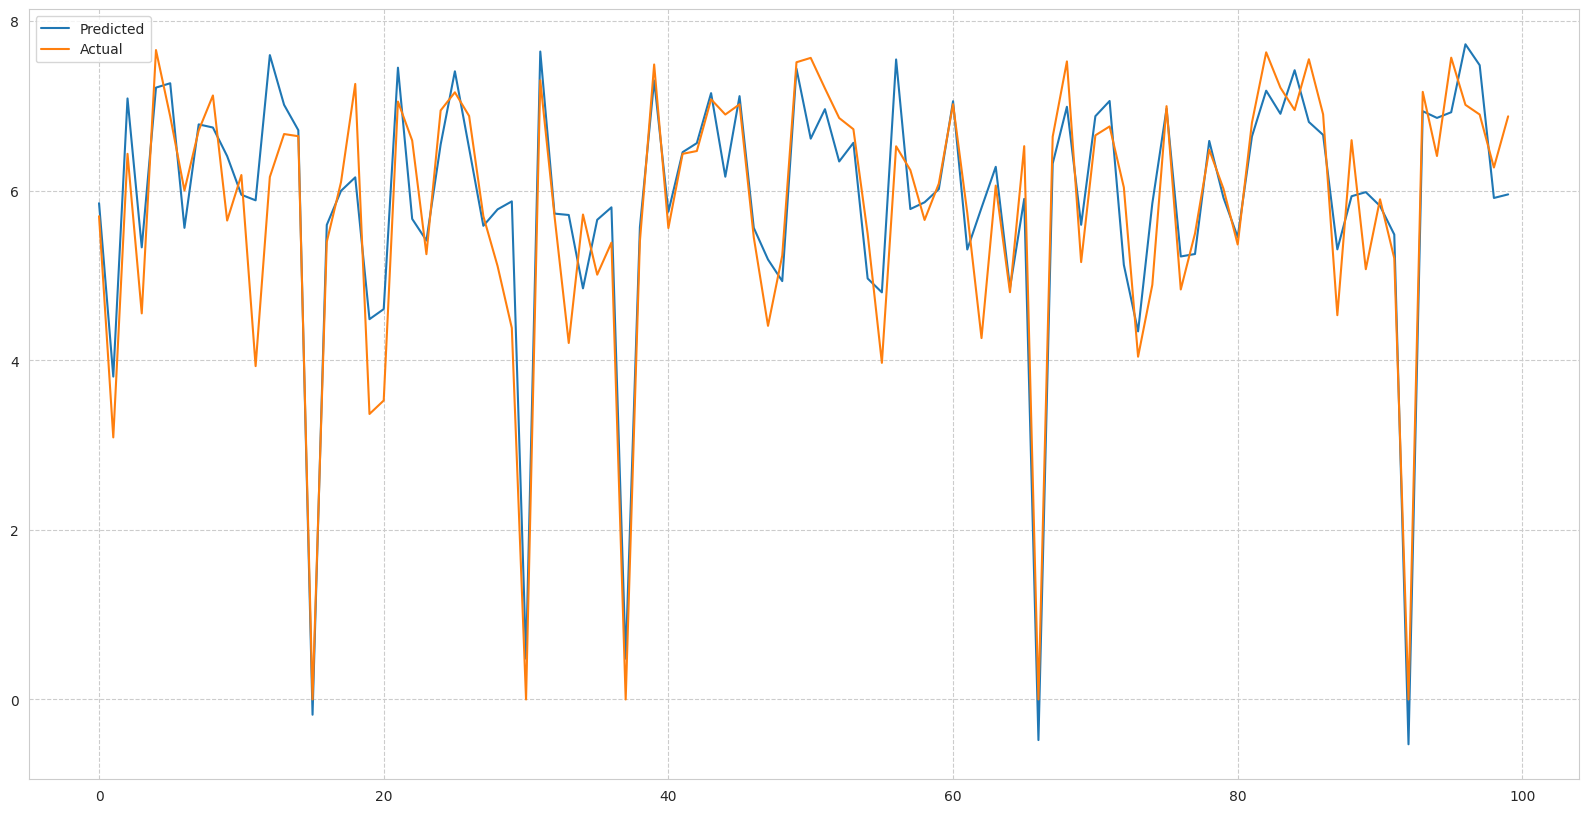

In [ ]:
# Training the model
train_model(linear_model, X_train, y_train, X_test, y_test)

### **Regularization** - Lasso, Ridge & Elasticnet

### **LASSO REGRESSION**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# finding the best parameters for lasso using gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()

In [ ]:
# setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


******************----- Model Evaluation Metrics Summary -----******************

MSE : 53.58080954037093
RMSE : 7.319891361241021
R2 : 0.7488379853068039
Adjusted R2 :  0.747086506822193

********************************************************************************


***********************----- Model Evaluation Graph -----***********************



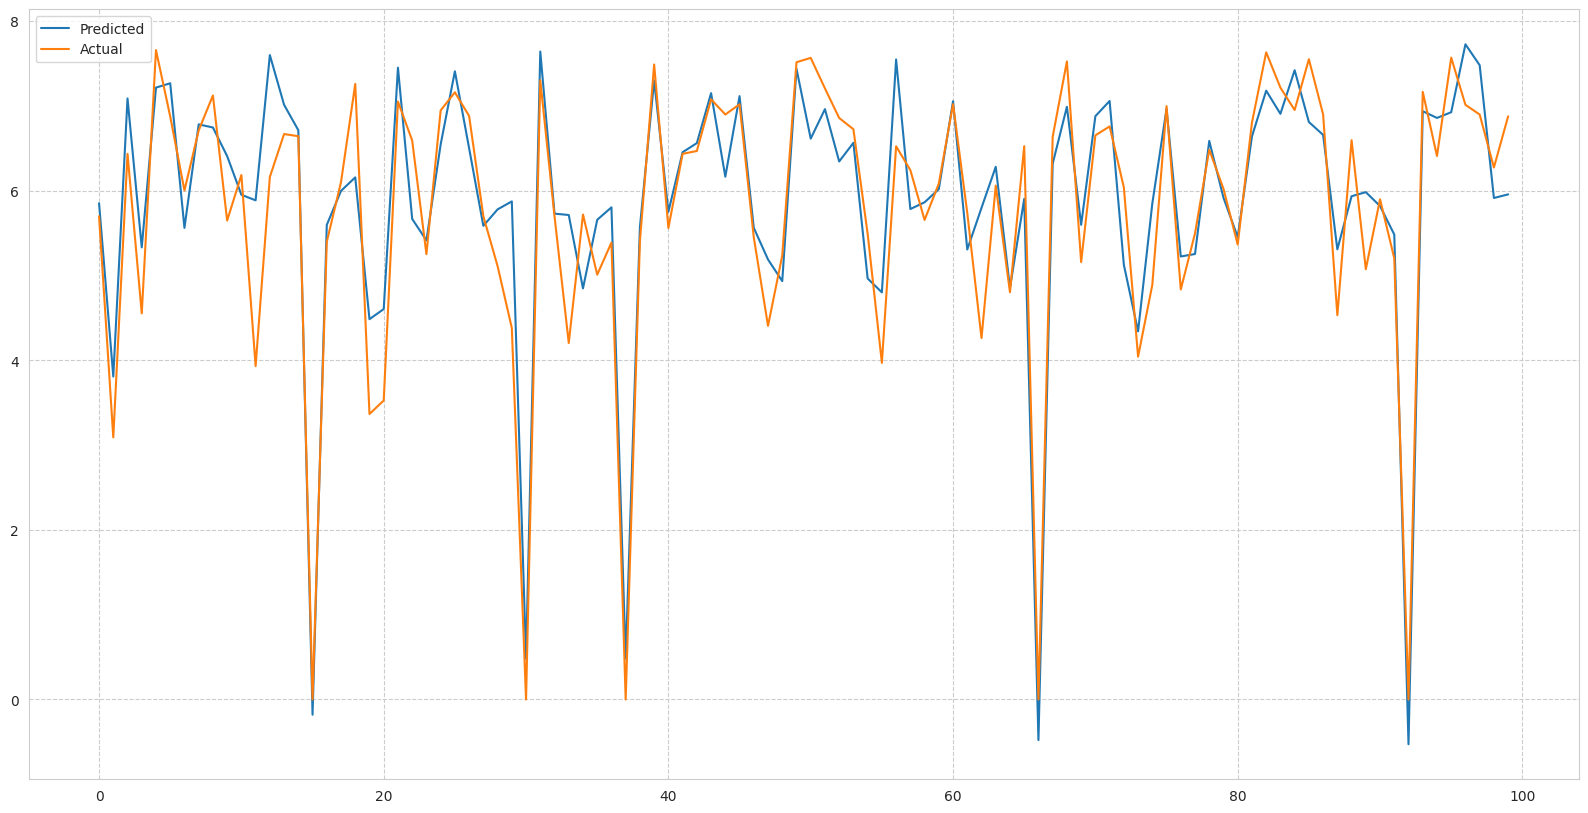

In [ ]:
# Training the model
train_model(lasso_grid, X_train, y_train, X_test, y_test)

### **RIDGE REGRESSION**

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [ ]:
# finding the best parameters for ridge model using gridsearchcv
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


******************----- Model Evaluation Metrics Summary -----******************

MSE : 53.629030325399384
RMSE : 7.323184438848948
R2 : 0.748611948604079
Adjusted R2 :  0.746858893852364

********************************************************************************


***********************----- Model Evaluation Graph -----***********************



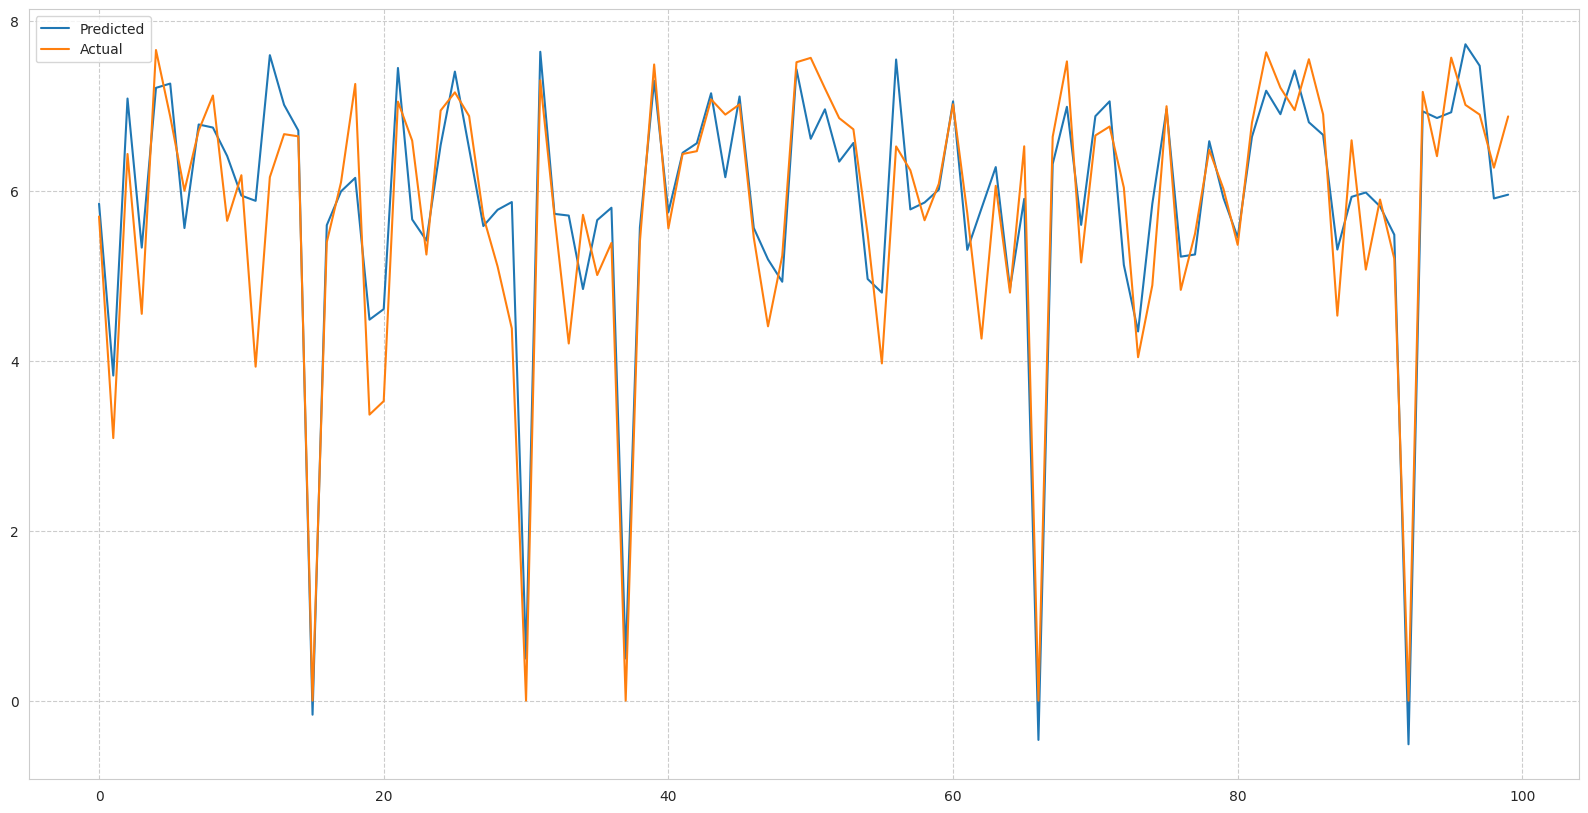

In [ ]:
# Training the model
train_model(ridge_grid, X_train, y_train, X_test, y_test)

### **ELASTICNET REGRESSION**

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [ ]:
# finding the best parameters for ridge model using gridsearchcv
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


******************----- Model Evaluation Metrics Summary -----******************

MSE : 53.63495649437842
RMSE : 7.323589044613196
R2 : 0.748584169469106
Adjusted R2 :  0.7468309209995739

********************************************************************************


***********************----- Model Evaluation Graph -----***********************



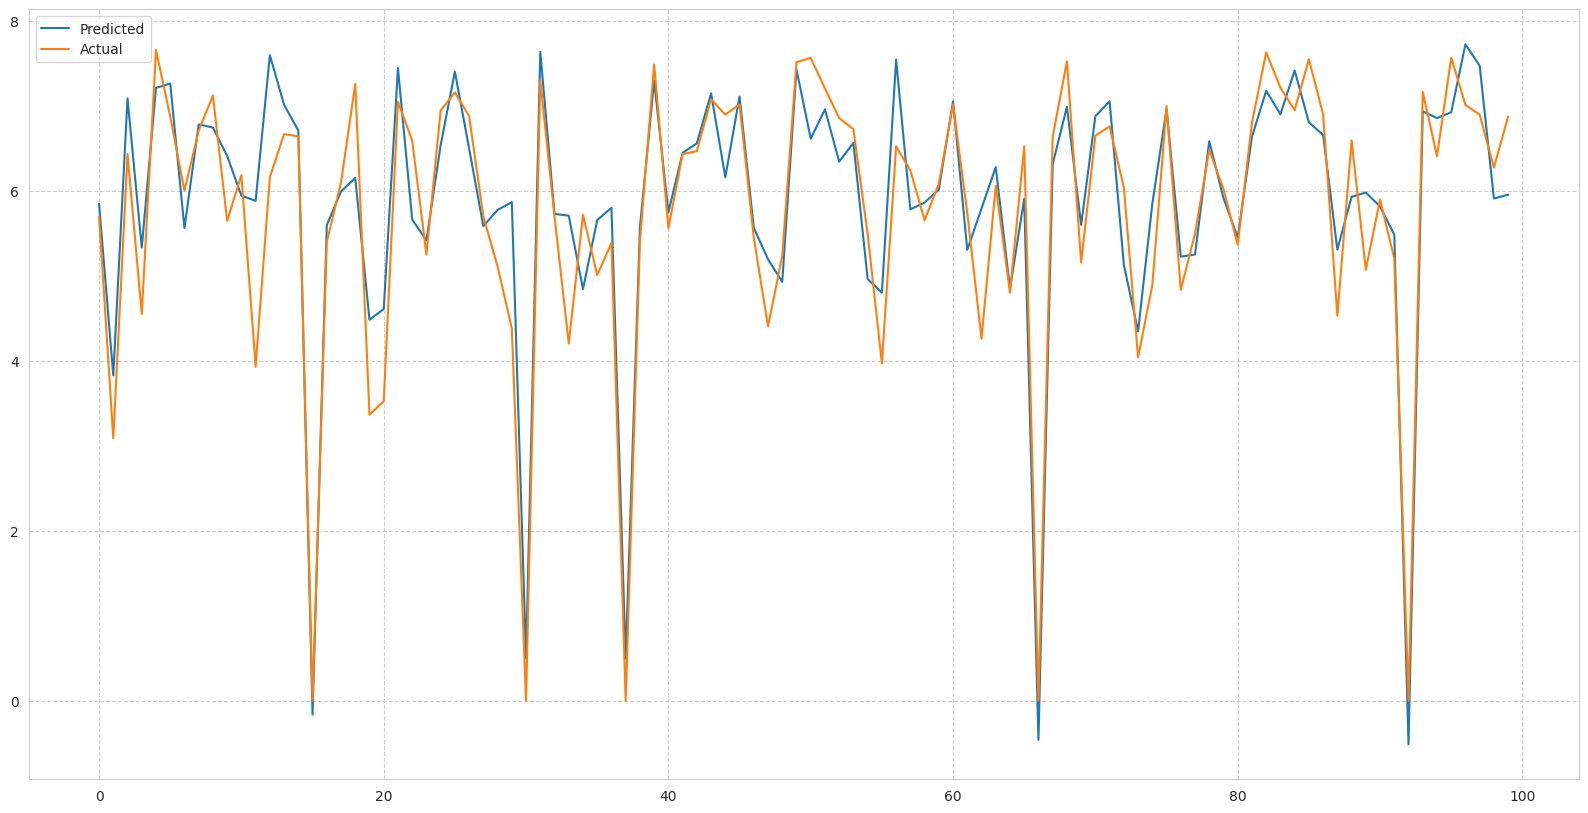

In [ ]:
# Training the model
train_model(elastic_grid, X_train, y_train, X_test, y_test)

### **KNN & Tree Based Models**

In [ ]:
# spliting X and y to train and test data for Tree Based models

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### **KNN Regression**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scaling all the feature by min max scaler
scaler = MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

In [ ]:
# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)


******************----- Model Evaluation Metrics Summary -----******************

MSE : 28.7419129756169
RMSE : 5.361148475431071
R2 : 0.8580377091463227
Adjusted R2 :  0.8570477350120571

********************************************************************************


******************----- Model Evaluation Metrics Summary -----******************



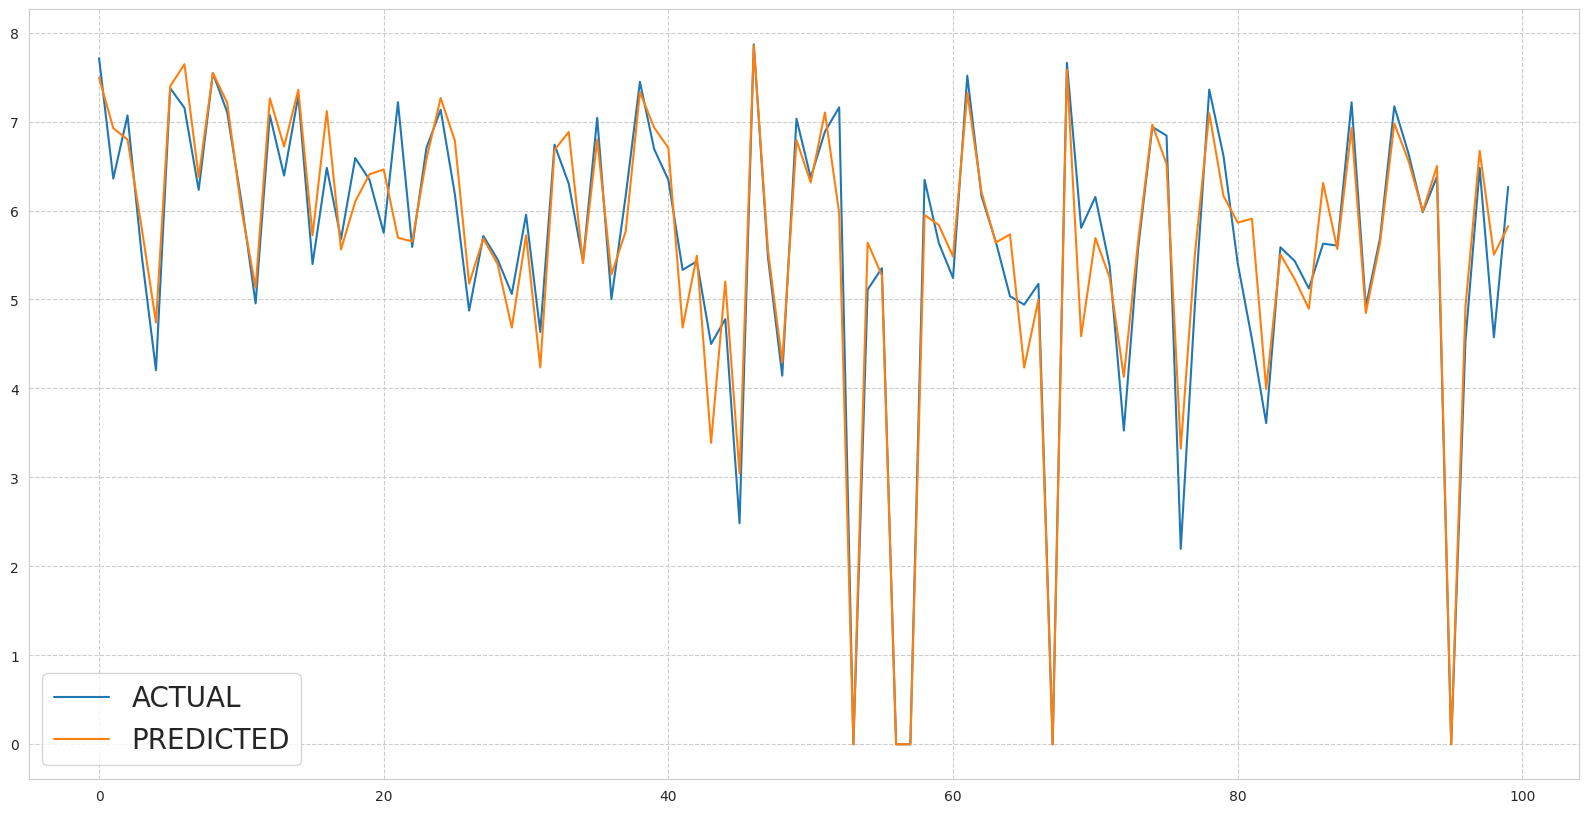

In [ ]:
# Training and Evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

### **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Creating Decision Tree model
dt_model = DecisionTreeRegressor()


******************----- Model Evaluation Metrics Summary -----******************

MSE : 31.8173292224101
RMSE : 5.640685173133677
R2 : 0.8428475881514619
Adjusted R2 :  0.8417516856978459

********************************************************************************


******************----- Model Evaluation Metrics Summary -----******************



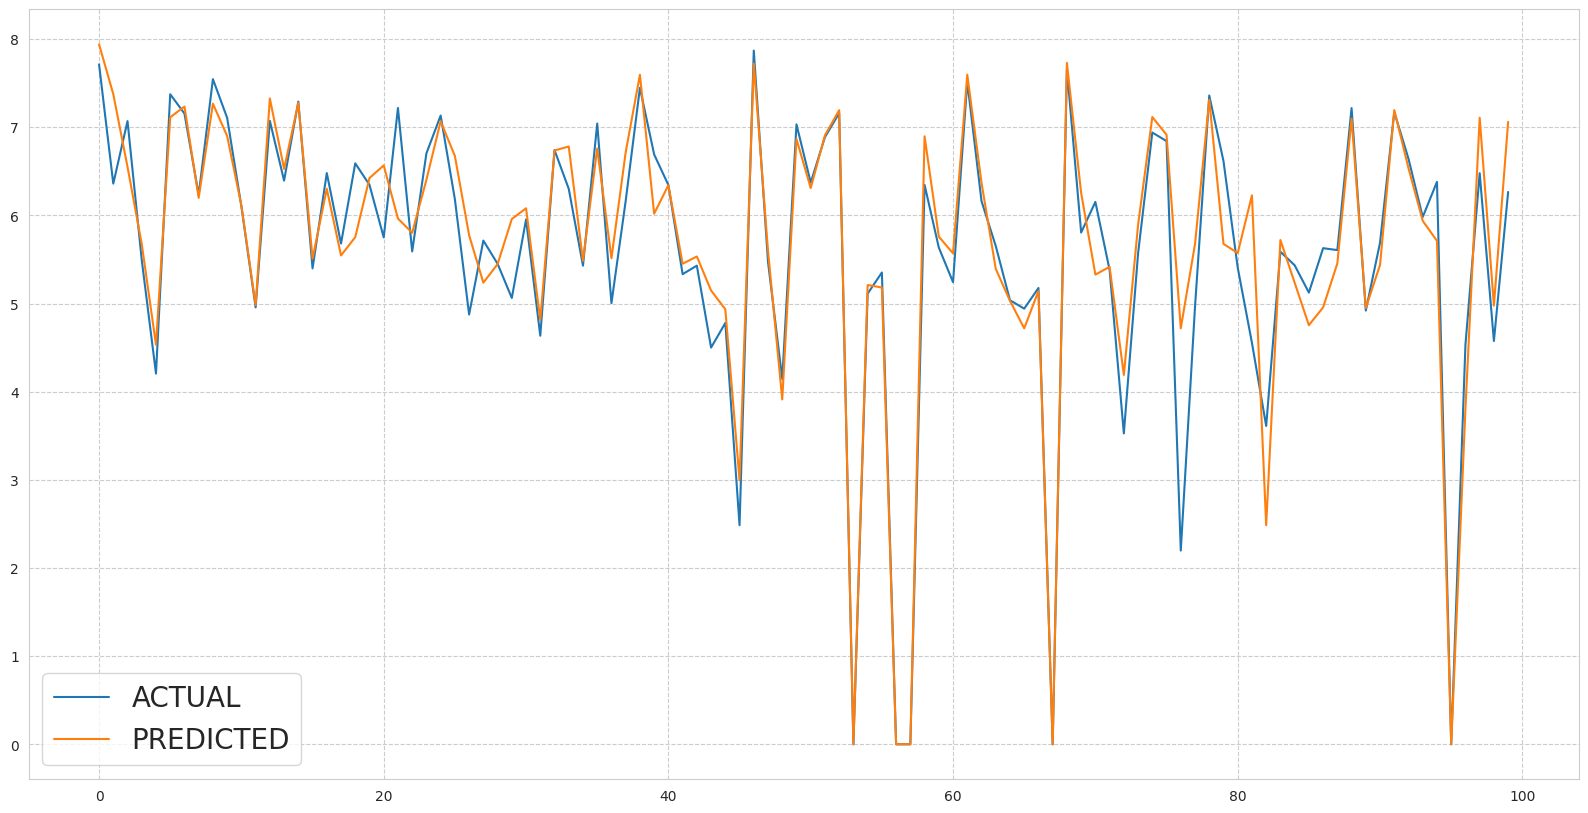

In [ ]:
# Training and Evaluating the PolynomialFeatures of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

### **RANDOM FOREST**

In [ ]:
# importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Creating model of random forest
rf_model = RandomForestRegressor()

In [ ]:
# creating parameters dictionary to check random forest with diffirent value of parameters through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
# Creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


******************----- Model Evaluation Metrics Summary -----******************

MSE : 22.535819748270793
RMSE : 4.747190721708028
R2 : 0.8886908954026782
Adjusted R2 :  0.8879146812841474

********************************************************************************


******************----- Model Evaluation Metrics Summary -----******************



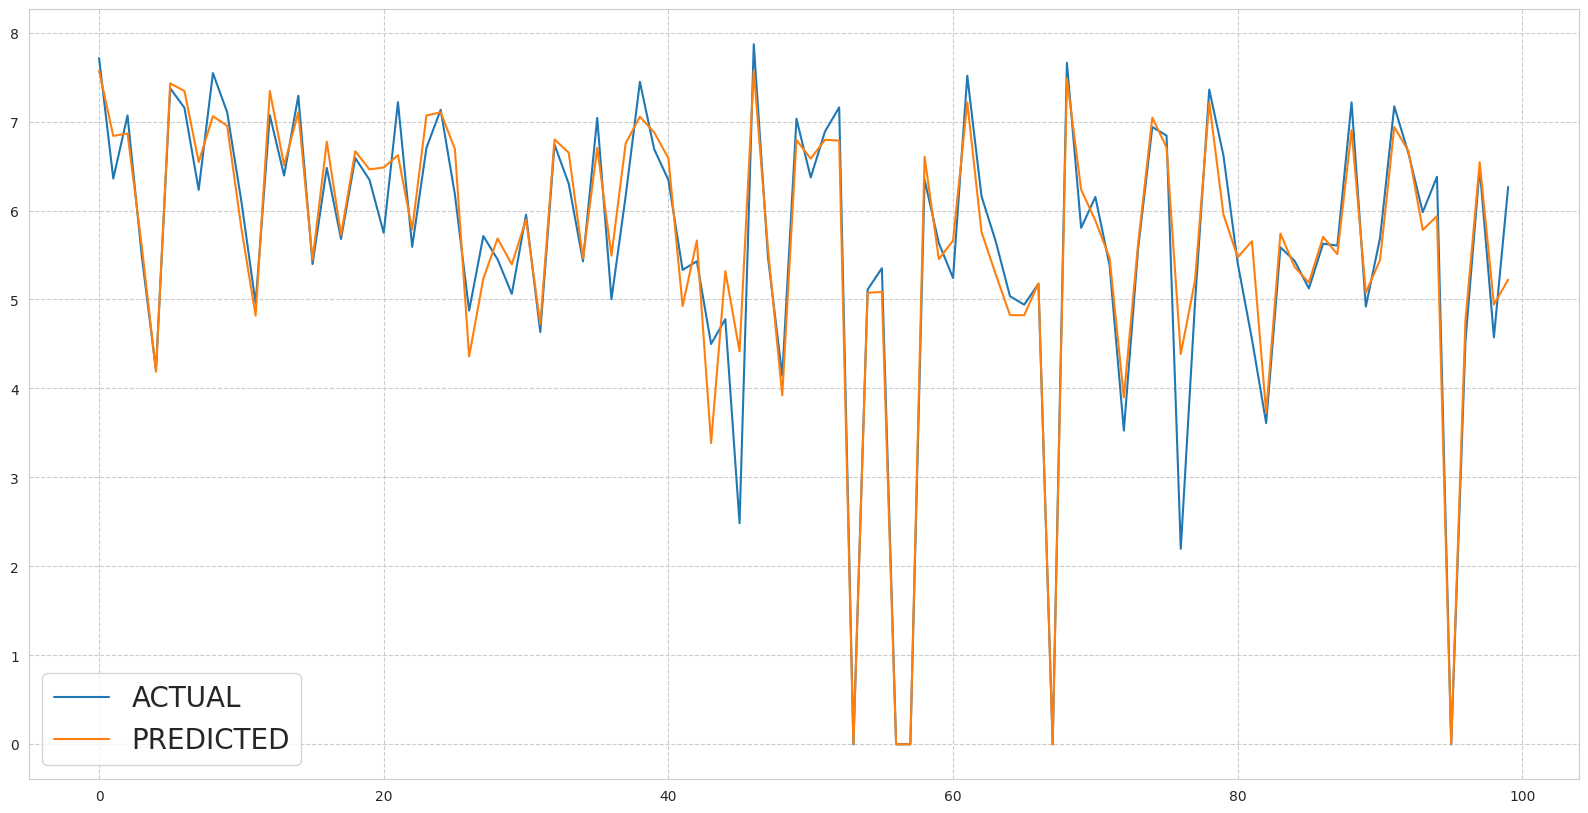

In [ ]:
# Training and Evaluating the PolynomialFeatures of Random forest
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [ ]:
# optimal rf model
optimal_rf_model = rf_grid.best_estimator_

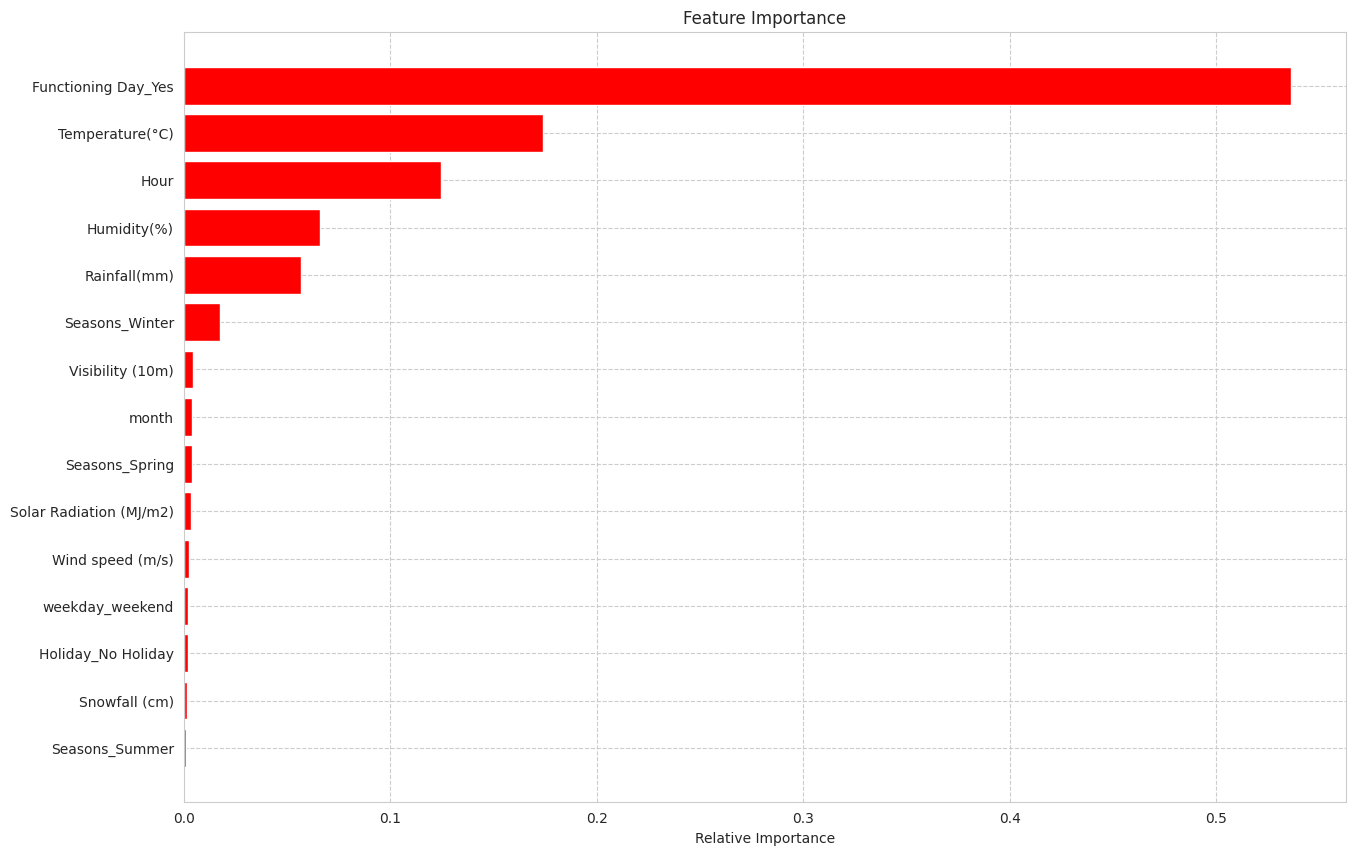

In [ ]:
# getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

### **GRADIENT BOOST**

In [ ]:
# importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [ ]:
# creating parameters dictionary to check different value of parameters
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
# grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


******************----- Model Evaluation Metrics Summary -----******************

MSE : 20.17652693642859
RMSE : 4.491828907742212
R2 : 0.9003439336902782
Adjusted R2 :  0.8996489820423722

********************************************************************************


******************----- Model Evaluation Metrics Summary -----******************



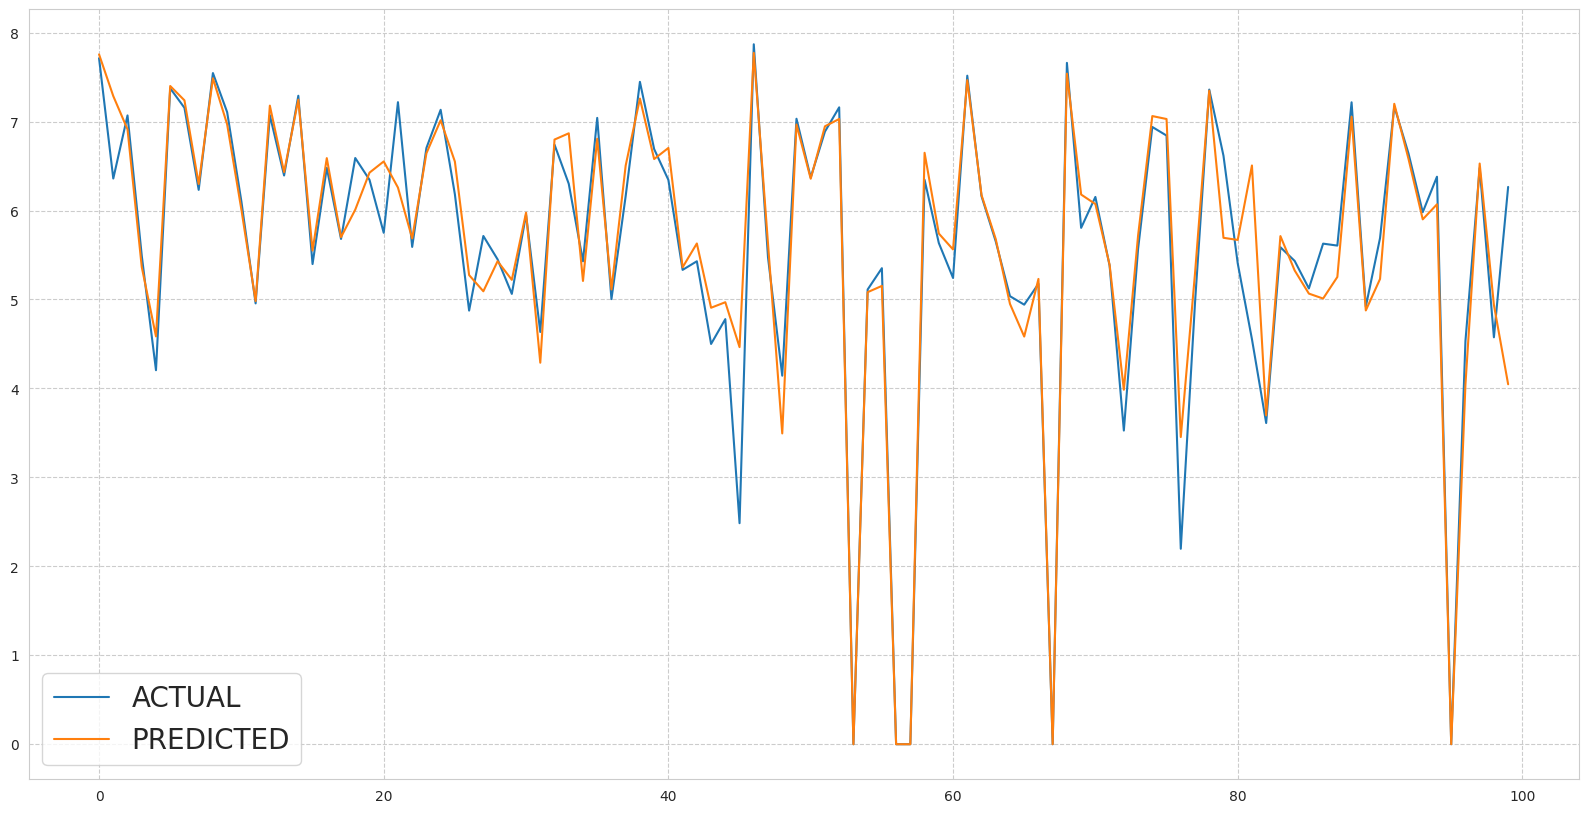

In [ ]:
# Training and Evaluating the PolynomialFeatures of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [ ]:
# getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

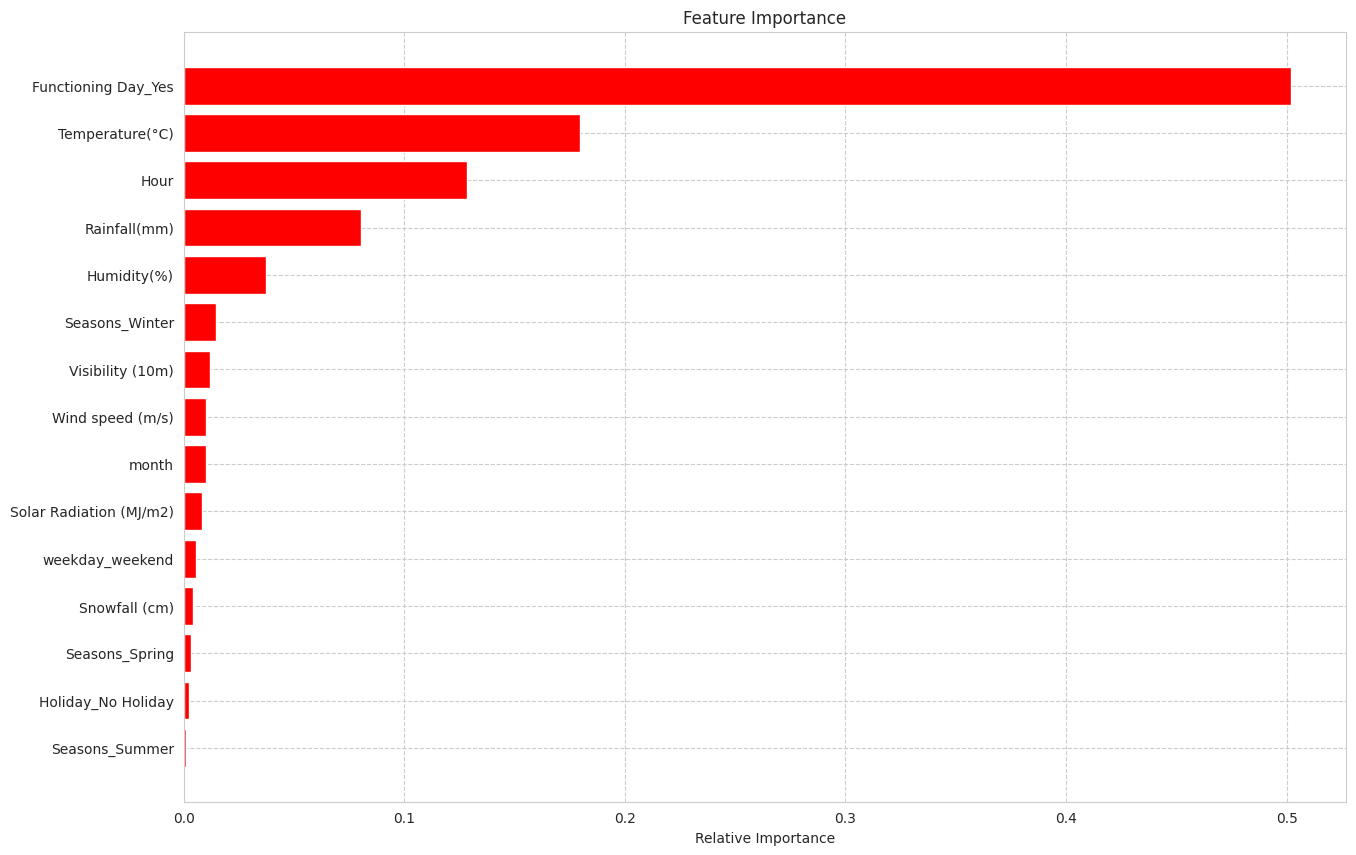

In [ ]:
# getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

### **XGB**

In [ ]:
# importing XGBoost Regressor
from xgboost import XGBRegressor

In [ ]:
# creating Xgboost model
xgb_model=XGBRegressor()

In [ ]:
# creating paramters dictionary for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
# creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)


******************----- Model Evaluation Metrics Summary -----******************

MSE : 16.399039659502126
RMSE : 4.04957277493591
R2 : 0.9190017296399784
Adjusted R2 :  0.9184368881451386

********************************************************************************


******************----- Model Evaluation Metrics Summary -----******************



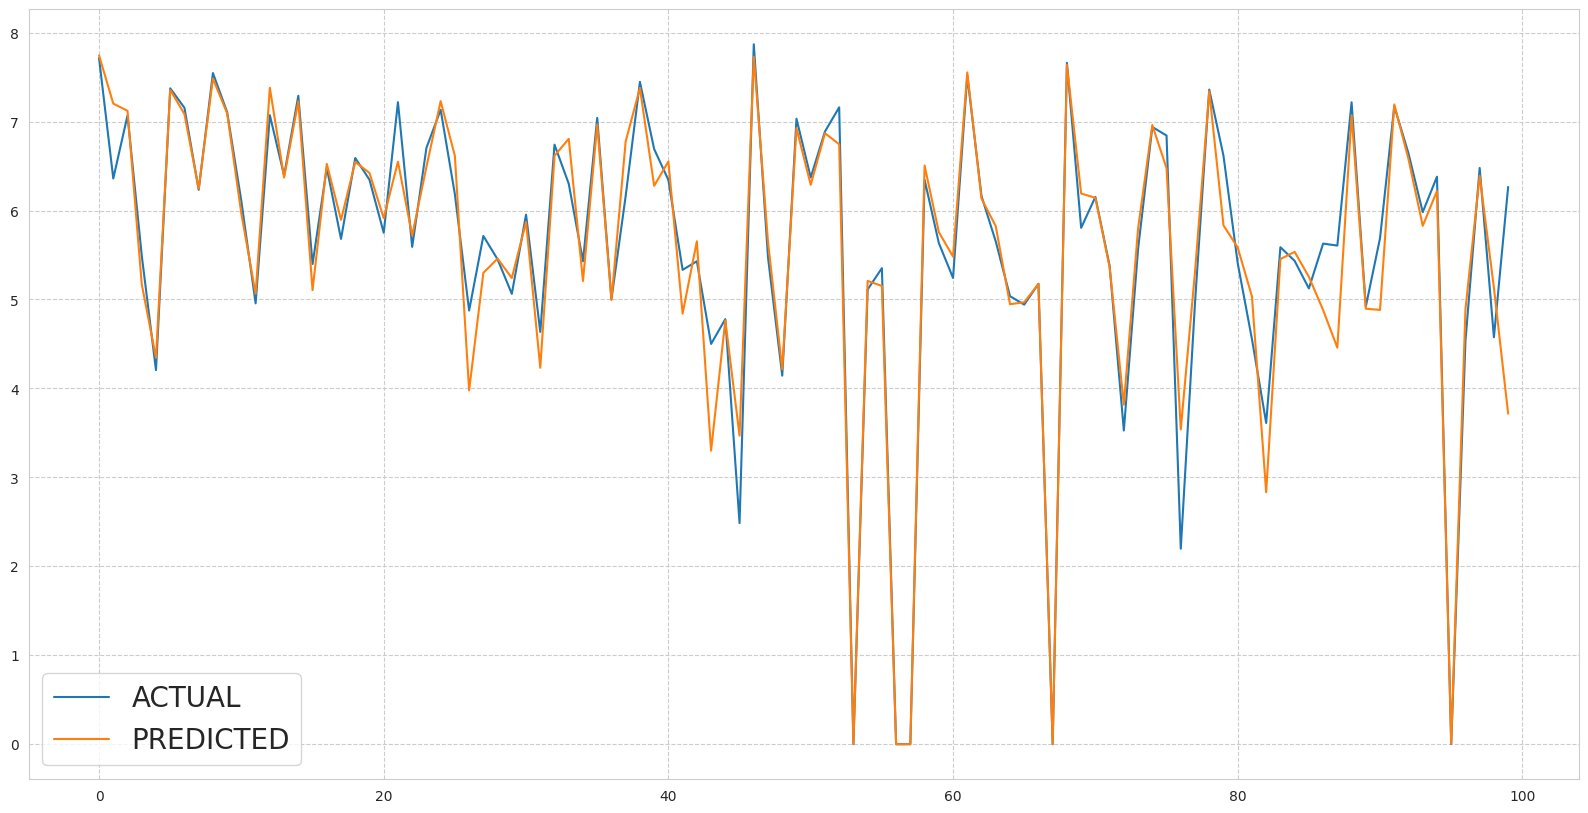

In [ ]:
# calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test)

In [ ]:
# getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

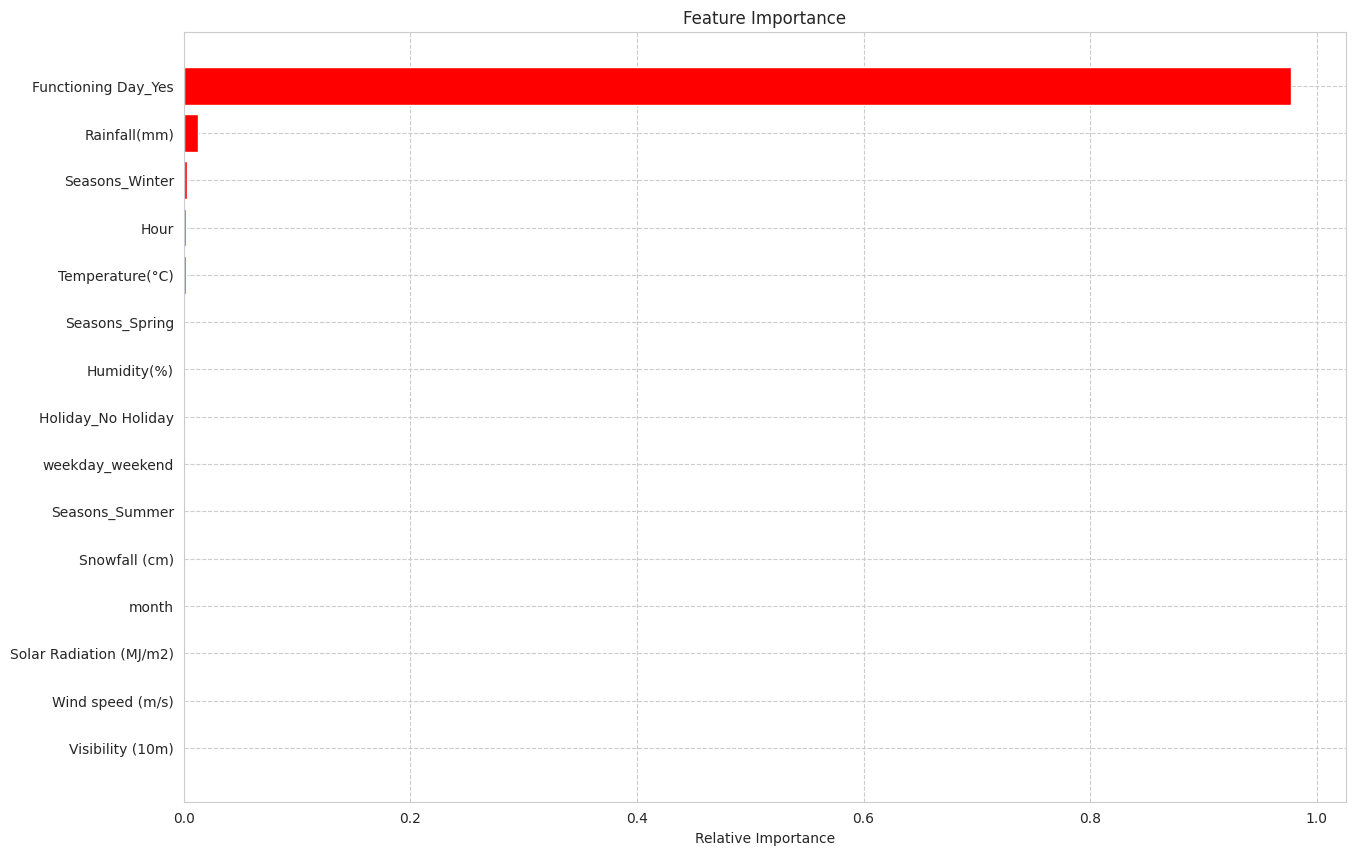

In [ ]:
# getting feature importance of xgb model
get_features_importance(optimal_xgb_model,X_train)

### **CATBOOST**

In [ ]:
#installing catboost
!pip install catboost

In [ ]:
# importing cat boost Regressor
from catboost import CatBoostRegressor

In [ ]:
# creating Catboost model
cb = CatBoostRegressor(verbose=0)


******************----- Model Evaluation Metrics Summary -----******************

MSE : 14.267289908091925
RMSE : 3.777206627667055
R2 : 0.9295308853887166
Adjusted R2 :  0.9290394689688333

********************************************************************************


******************----- Model Evaluation Metrics Summary -----******************



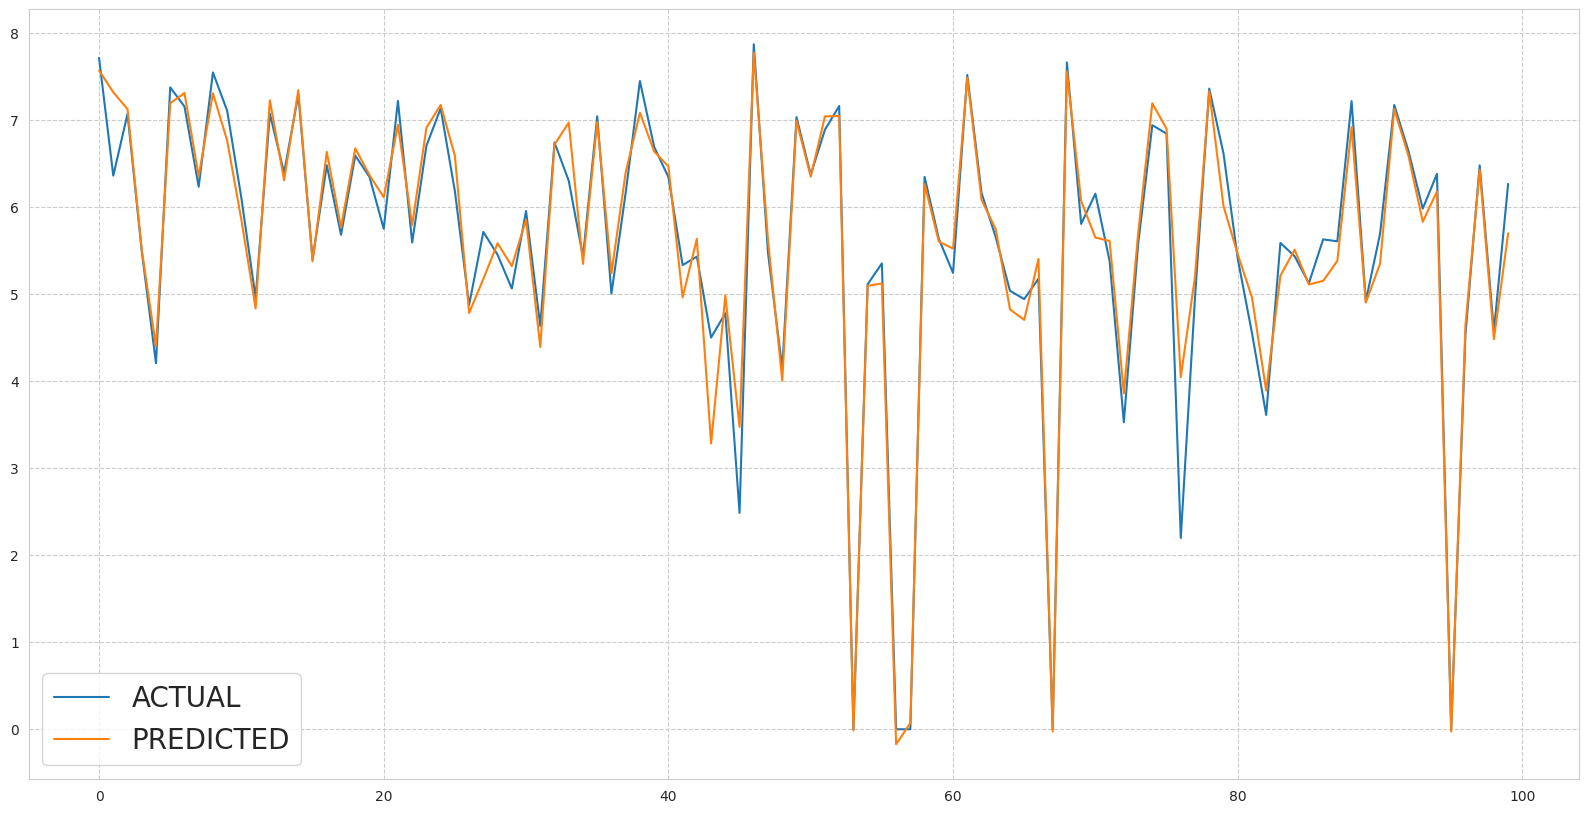

In [ ]:
# calling run_model to train,fit and evalution of catboost model
run_model(cb,X_train,y_train,X_test,y_test)

In [ ]:
#checking params of cat boost model
cb.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'lear

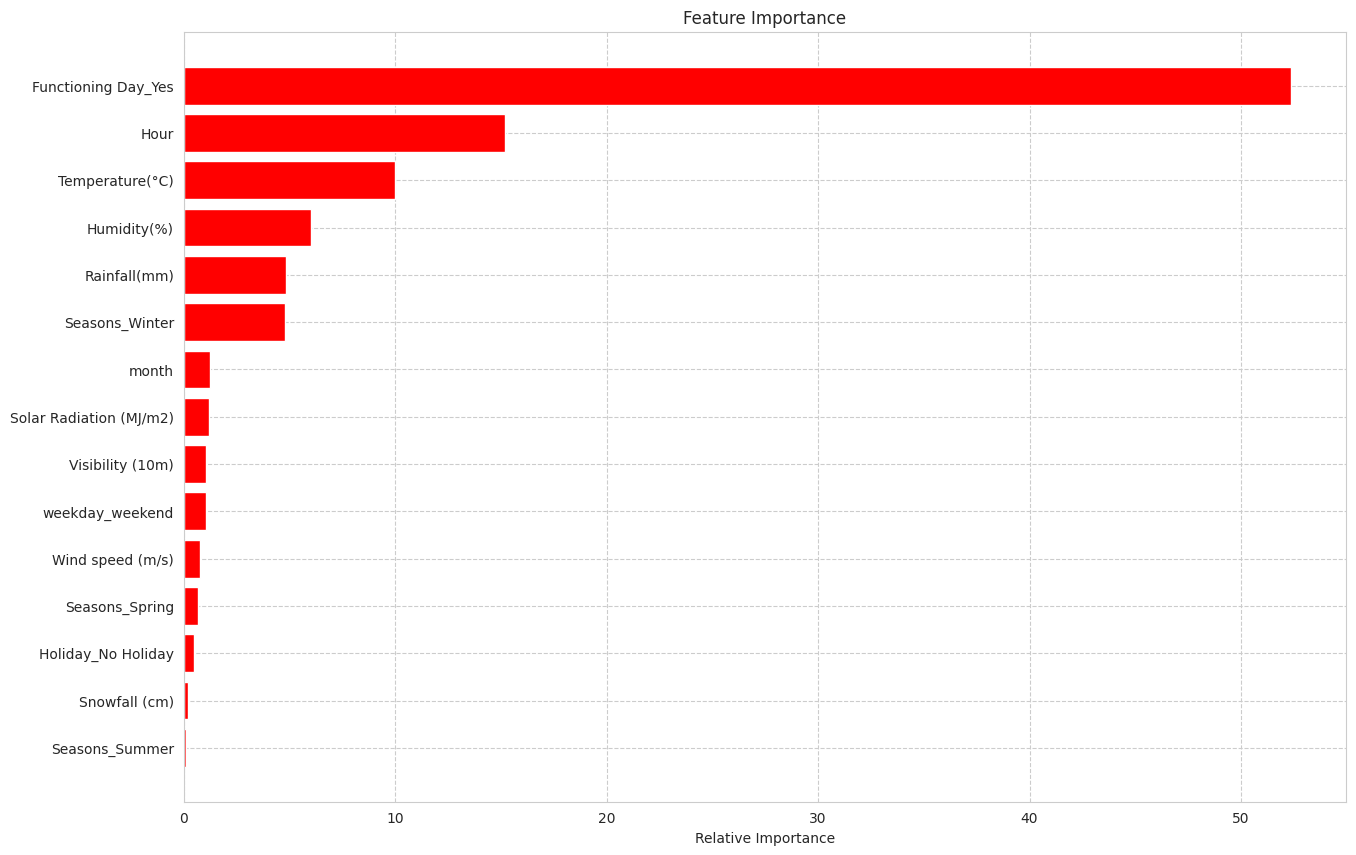

In [ ]:
# getting and visualizing features importance of catboost model
get_features_importance(cb,X_train)

## **Comparision of All Regression Models**

In [ ]:
# creating dictionary to store all the metrices
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}
all_model_matrices

{'Mean_square_error': [53.579045267976745,
  53.58080954037093,
  53.629030325399384,
  53.63495649437842,
  28.7419129756169,
  31.8173292224101,
  22.535819748270793,
  20.17652693642859,
  16.399039659502126,
  14.267289908091925],
 'Root_Mean_square_error': [7.319770848050966,
  7.319891361241021,
  7.323184438848948,
  7.323589044613196,
  5.361148475431071,
  5.640685173133677,
  4.747190721708028,
  4.491828907742212,
  4.04957277493591,
  3.777206627667055],
 'R2': [0.7488462553985176,
  0.7488379853068039,
  0.748611948604079,
  0.748584169469106,
  0.8580377091463227,
  0.8428475881514619,
  0.8886908954026782,
  0.9003439336902782,
  0.9190017296399784,
  0.9295308853887166],
 'Adjusted_R2': [0.747094834585397,
  0.747086506822193,
  0.746858893852364,
  0.7468309209995739,
  0.8570477350120571,
  0.8417516856978459,
  0.8879146812841474,
  0.8996489820423722,
  0.9184368881451386,
  0.9290394689688333]}

In [ ]:
# list of all model made
model_name=['Linear','Lasso','Ridge','Elasticnet','K-Nearest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CatBoost']

In [ ]:
# converting dictionary to dataframe for easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)
matrices_df

Linear      Lasso      Ridge  Elasticnet  \
Mean_square_error       53.579045  53.580810  53.629030   53.634956   
Root_Mean_square_error   7.319771   7.319891   7.323184    7.323589   
R2                       0.748846   0.748838   0.748612    0.748584   
Adjusted_R2              0.747095   0.747087   0.746859    0.746831   

                        K-Nearest_Neighbor  Decision_Tree  Random_Forest  \
Mean_square_error                28.741913      31.817329      22.535820   
Root_Mean_square_error            5.361148       5.640685       4.747191   
R2                                0.858038       0.842848       0.888691   
Adjusted_R2                       0.857048       0.841752       0.887915   

                        Gradient_Boosting  Xtreme_GB   CatBoost  
Mean_square_error               20.176527  16.399040  14.267290  
Root_Mean_square_error           4.491829   4.049573   3.777207  
R2                               0.900344   0.919002   0.929531  
Adjusted_R2                      0.899649   0.918437   0.929039

In [ ]:
# transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})
final_matrices

Models  Mean_square_error  Root_Mean_square_error        R2  \
0              Linear          53.579045                7.319771  0.748846   
1               Lasso          53.580810                7.319891  0.748838   
2               Ridge          53.629030                7.323184  0.748612   
3          Elasticnet          53.634956                7.323589  0.748584   
4  K-Nearest_Neighbor          28.741913                5.361148  0.858038   
5       Decision_Tree          31.817329                5.640685  0.842848   
6       Random_Forest          22.535820                4.747191  0.888691   
7   Gradient_Boosting          20.176527                4.491829  0.900344   
8           Xtreme_GB          16.399040                4.049573  0.919002   
9            CatBoost          14.267290                3.777207  0.929531   

   Adjusted_R2  
0     0.747095  
1     0.747087  
2     0.746859  
3     0.746831  
4     0.857048  
5     0.841752  
6     0.887915  
7     0.899649  
8     0.918437  
9     0.929039

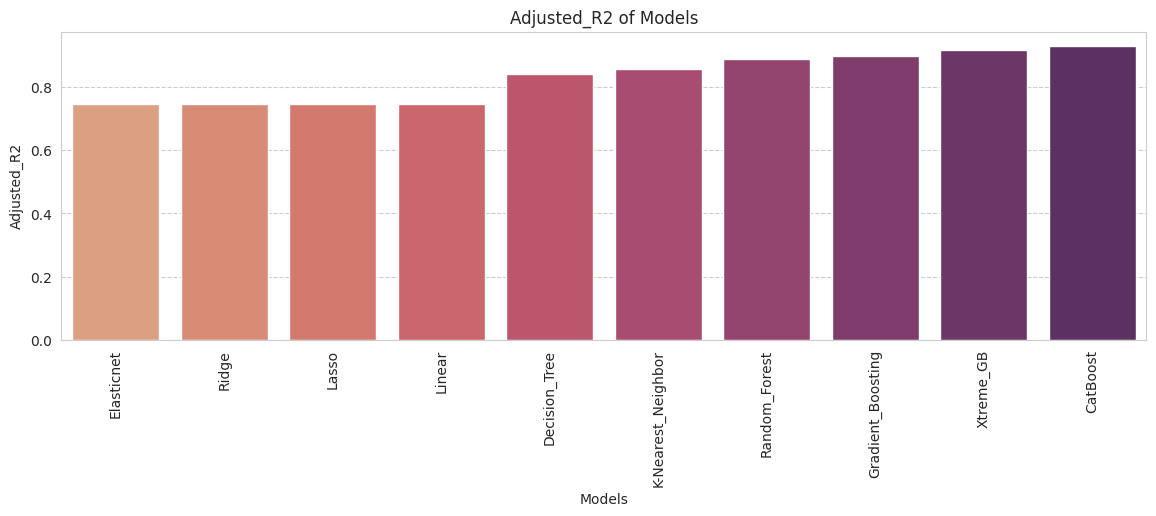

In [ ]:
# creating bar plot to visualize the Adjusted R2 of model
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjusted_R2 of Models')
plt.xticks(rotation=90);

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***